
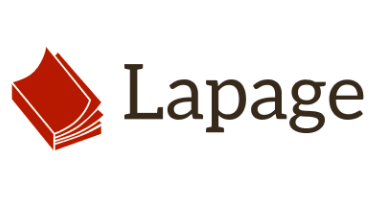

***
### <center>Analysez les ventes d'une librairie avec R ou Python

#### Scenario:   
##### Vous êtes consultant Data Analyst chez Lapage, une grande librairie généraliste en ligne très réputée. Vous êtes directement rattaché au service Marketing.
<b>Sommaire:</b><a class="anchor" id="Up"></a>
* [1 Exploration des données](#chapter1)
    * [1.1 fichier 'Clients'](#section_1_1)
    * [1.2 fichier 'Produits'](#section_1_2)
    * [1.3 fichier 'Transactions'](#section_1_3)
* [2 Jointure des fichiers](#chapter2)
    * [2.1 Nettoyage post jointure](#section_2_1)
* [3 Mission Antoine: Analyse des différents indicateurs et graphiques autour du CA](#chapter3)
    * [3.1 Analyse des différents indicateurs et graphiques autour du CA](#section_3_1)
        * [3.1.1 Moyennes mobiles](#section_3_1_1)
        * [3.1.2 Saisonalité sur 2022](#section_3_1_2)    
        * [3.1.3 Zoom sur les références par catégories](#section_3_1_3)
        * [3.1.4 Tops & Flops des références](#section_3_1_4)
    * [3.2 Profil Clients](#section_3_2)
        * [3.2.1 Distribution du CA par clients](#section_3_2_1)
        * [3.2.2 Distribution du CA par âge des clients](#section_3_2_2)
        * [3.2.3 Répartitions par Genre](#section_3_2_3)
* [4 Mission Julie: Tests statistiques, analyse de corrélation entre différentes variables](#chapter4)
    * [Corrélation entre le genre d'un client et les catégories de livres achetés](#section_4_1)
    * [Corrélation entre l'âge des client et le montant des achats](#section_4_2)
    * [Corrélation entre l'âge des clients et la fréquence d'achat](#section_4_3)
    * [Corrélation entre l'âge des clients et la taille du panier moyen](#section_4_4)
    * [Corrélation entre l'âge des clients et les catégories de livres achetés](#section_4_5)
    


<b>Import des librairies</b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from scipy import stats
#Importation de la librairie scipy.stats
import scipy.stats as st
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr

# Test de normalité 
from scipy.stats import shapiro # Shapiro-Wilk Test
from scipy.stats import normaltest # D’Agostino’s K^2 Test
from scipy.stats import ks_2samp #  Kolmogorov-Smirnov 
from scipy.stats import anderson # Anderson-Darling Test
from scipy.stats import bartlett
from scipy.stats import kstest
#Importation de la librairie statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols # régression ordinaire des moindres carrés (OLS)
from statsmodels.stats.anova import anova_lm

import warnings
warnings.filterwarnings('ignore')

# Dossier de sauvegarde graphiques 
url_fig = 'graphiques/'

In [3]:
sns.set(style='whitegrid',context='notebook', palette='Paired',
    rc={'figure.figsize':(8,4)})

In [4]:
# réduction du nombre de décimales 
pd.options.display.float_format = '{:.2f}'.format

<b>Import du dataset composé de 3 fichiers: clients, produits et transactions</b>  

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#customers = pd.read_csv('/content/drive/MyDrive/Data/customers.csv')
#products = pd.read_csv('/content/drive/MyDrive/Data/products.csv')           
#transactions = pd.read_csv('/content/drive/MyDrive/Data/transactions.csv')
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')           
transactions = pd.read_csv('transactions.csv')

***
[Up](#Up)
<a class="anchor" id="chapter1"></a>   

<b>Exploration des données</b> 

<a class="anchor" id="section_1_1"></a> 

<b>Fichier Clients</b> 

In [7]:
def info_data(df):
    print('\033[1;34mContrôle_import_dataframe\033[0m')
    print(df.head())
    print ('-'*45)
    print('\033[1;34mInfos_du_dataframe\033[0m')
    print(df.info())
    print ('-'*45)
    print('\033[1;34mRecherche_des_doublons\033[0m')
    print(df.duplicated().sum())
    print ('-'*45)
    print('\033[1;34mRecherche_des_valeurs_manquantes\033[0m')
    print(df.isna().sum())
    print ('-'*45)
    print('\033[1;34mNombre_de_valeurs_uniques_par_variables\033[0m')
    print(df.nunique())
    print ('-'*45)
    print('\033[1;34mIndicateurs statistiques\033[0m')
    print(df.describe())
    print ('-'*45)

In [8]:
info_data(customers)

Contrôle_import_dataframe
  client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943
---------------------------------------------
Infos_du_dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
None
---------------------------------------------
Recherche_des_doublons
0
---------------------------------------------
Recherche_des_valeurs_manquantes
client_id    0
sex          0
birth        0
dtype: int64
---------------------------------------------
Nombre_de_valeurs_uniques_par_variables
client_id    8623
sex             2
birth          76
dtype: int64
---------------------------------------------
Indica

<b>Nous modifions le nom de la variable 'birth' par 'âge' pour une meilleure lisibilité</b>  

In [9]:
customers['âge'] = 2023 - customers['birth']
customers = (customers.drop(['birth'],axis=1))
customers.head()

,client_id,sex,âge
0,c_4410,f,56
1,c_7839,f,48
2,c_1699,f,39
3,c_5961,f,61
4,c_5320,m,80


In [10]:
# contrôle describe
customers.describe(include='all')

,client_id,sex,âge
count,8623,8623,8623.00
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,44.72
std,NaN,NaN,16.92
min,NaN,NaN,19.00
25%,NaN,NaN,31.00
50%,NaN,NaN,44.00
75%,NaN,NaN,57.00


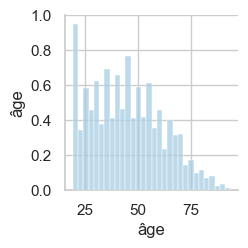

In [11]:
# Toujours utile de faire un pairplot pour un visu du data
sns.pairplot(customers)
plt.savefig(url_fig + 'pairplot_customers', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# Nous constatons que la tranche des plus jeunes(19 ans) est nettement plus forte.
customers['âge'].value_counts()

19    440
44    215
35    207
37    203
45    199
     ... 
90      8
91      6
92      4
93      4
94      3
Name: âge, Length: 76, dtype: int64

Countplot for Category


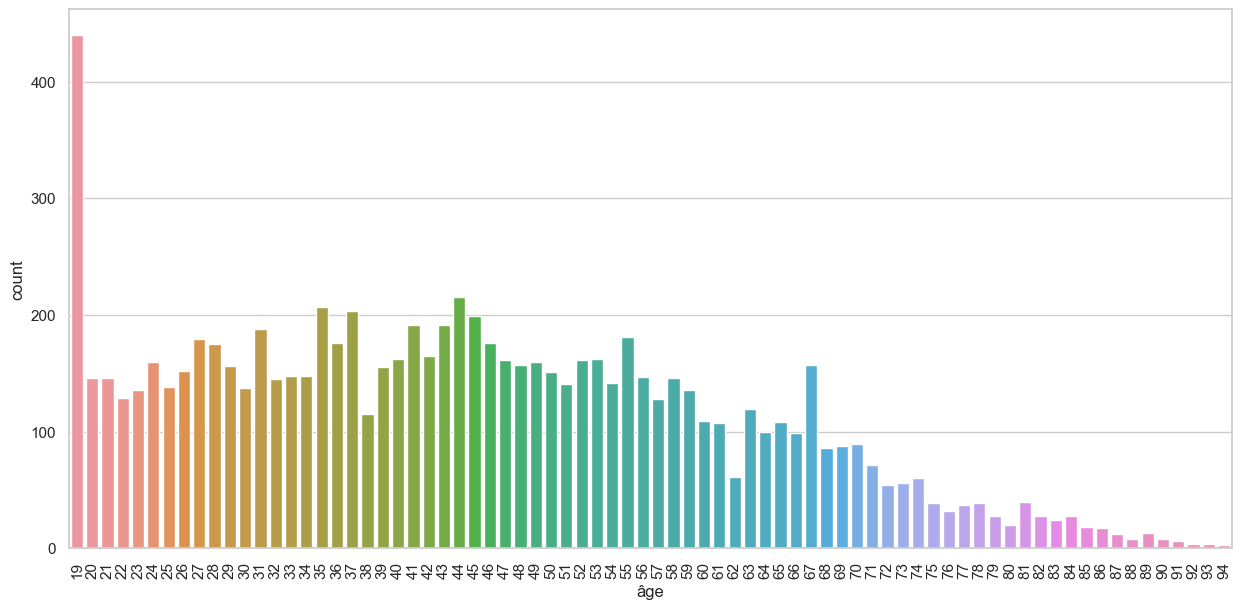

In [13]:
plt.figure(figsize=[15,7],)
print('Countplot for Category')
sns.countplot(data = customers,x='âge')
plt.xticks(rotation = 90)
plt.savefig(url_fig + 'countplog_ages_clients', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
# calcul avg/age
df_avg19=((customers['âge'] == 19).sum())*100 / customers['âge'].count()
print("Le pourcentage des 19 ans représente {:.2f}% du total".format(df_avg19))  

Le pourcentage des 19 ans représente 5.10% du total


<b>Conclusions Post Analyse fichier Clients</b>
   
   - 8623 lignes pour 3 variables:
    - <b>client_id:</b> composée de 8623 <b>valeurs uniques</b> pour l'ensemble des valeurs
    - <b>sex:</b> composée de 2 modalités [ h,f ] pour homme et femme
    - <b>birth:</b> composée des années de naissance de 1929 à 2004, variable que nous avons   
      modifiée pour 'âge' (de 19 à 94 ans) pour une meilleure lisibilité.   
   - les types sont conformes
   - pas de doublons ni de valeurs manquantes
    - <i><u>Nous avons noté la forte proportion des clients agés de 19 ans</u></i> 
   - <b>Le df est conforme et peut être exploité</b>  

***
[Up](#Up)
<a class="anchor" id="section_1_2"></a> 

<b>Fichier Produits</b> 

In [15]:
info_data(products)

Contrôle_import_dataframe
  id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0
---------------------------------------------
Infos_du_dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB
None
---------------------------------------------
Recherche_des_doublons
0
---------------------------------------------
Recherche_des_valeurs_manquantes
id_prod    0
price      0
categ      0
dtype: int64
---------------------------------------------
Nombre_de_valeurs_uniques_par_variables
id_prod    3287
price      1455
categ         3
dtype: int64
---------------------------------------------
Indica

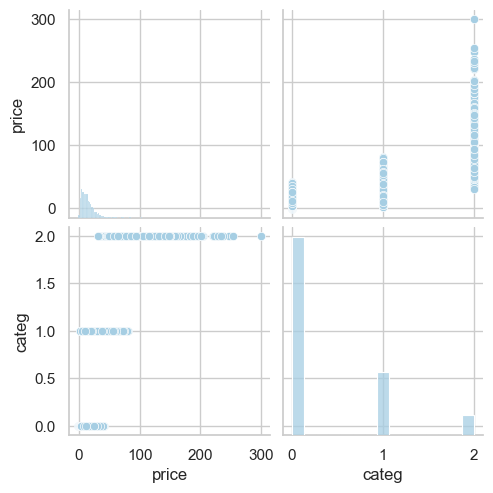

In [16]:
sns.pairplot(products)
plt.savefig(url_fig + 'paiplot_products', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# Nous notons la valeur négative dans le describe
# la valeur negative de price correspond à l'id_product T_0 (sera supprimé avec la suppression des 'tests')
products[products['price'] == -1]

,id_prod,price,categ
731,T_0,-1.00,0


In [18]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


<b>Conclusions Post Analyse fichier 'produits'</b>
   
   - 3287 lignes pour 3 variables:
    - <b>id_product:</b> composée de 3287 valeurs uniques pour l'ensemble des valeurs 
    - <b>price:</b> composée de valeurs numériques dont une négative (de -1 à 300 €) à supprimer avec les lignes 'test'
    - <b>categ:</b> composée de 3 catégories de livres et donc de gammes de prix différentes [0,1,2] bien visibles sur le             describe et le pairplot 
   - les types sont conformes
   - pas de doublons ni de valeurs manquantes
   - <b>Après suppression des lignes de test, le df sera conforme et pourra être exploité</b> 

***
[Up](#Up)
<a class="anchor" id="section_1_3"></a> 

<b>Fichier Transactions</b>

In [19]:
info_data(transactions)

Contrôle_import_dataframe
  id_prod                        date session_id client_id
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232
---------------------------------------------
Infos_du_dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB
None
---------------------------------------------
Recherche_des_doublons
126
---------------------------------------------
Recherche_des_valeurs_manquantes
i

***
Pas de pairplot sur des variables de type objet   
<b><u>Corrections à apporter</u></b>
- Doublons à supprimer (126), qui sont des lignes de test.
- le format de la variable date en 'objet' n'est pas conforme, modification du format
- nous avons 8602 clients qui ont réalisé des transactions pour un fichier de 8623 client_id, il ya donc 21 clients inactifs 
- nous avons 3267 produits ayant fait l'objet d'une transaction pour un fichier de 3287 prod_id, donc 20 produits non vendus sur la période 
- <b><i>nous devons donc:
     - supprimer les doublons
     - modifier le type de la variable date
     - calculer la période d'achats
     - décider de ce que nous faisons des clients et produits inactifs</i></b> 

In [20]:
# Nous avons 126 lignes en doublons
transactions.duplicated().sum()

126

In [21]:
# Aperçu des doublons
transactions[transactions.duplicated()]

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [22]:
# Nous constatons qu'il s'agit de lignes de test avec le mëme id_product 'T_O' et la même Session_id 's_0' que nous supprimons 
transactions = transactions.drop(transactions[transactions['date'].str.contains('test')].index)
# Contrôle de la suppression des lignes tests
transactions[transactions.duplicated()]

,id_prod,date,session_id,client_id


In [23]:
# Soldes Nb de lignes après suppression
transactions.drop_duplicates(inplace=True) 
print(len(transactions), 'lignes après suppression des doublons') 

679332 lignes après suppression des doublons


In [24]:
# Correction format date pour ne conserver que la date et l'heure sans les millisecondes etc
transactions[['date','number']]=transactions['date'].str.split('.', expand=True)
transactions.head()

,id_prod,date,session_id,client_id,number
0,0_1518,2022-05-20 13:21:29,s_211425,c_103,043970
1,1_251,2022-02-02 07:55:19,s_158752,c_8534,149409
2,0_1277,2022-06-18 15:44:33,s_225667,c_6714,155329
3,2_209,2021-06-24 04:19:29,s_52962,c_6941,835891
4,0_1509,2023-01-11 08:22:08,s_325227,c_4232,194479


In [25]:
# Les lignes avec le mot 'test' dans la date sont supprimées, nous pouvons modifier le format objet en date
# Nous ajoutons pour les analyses à venir les variables année, année_ mois, mois, jour, (heures pour les doublons)
transactions['date'] = pd.to_datetime(transactions['date'], format='%Y-%m-%d', errors='coerce')

transactions['année'] = transactions['date'].dt.year
transactions['mois'] = transactions['date'].dt.month
transactions['année_mois'] = transactions['date'].dt.strftime('%Y-%m')
transactions['jours'] = transactions['date'].dt.day
transactions['heure'] = transactions['date'].dt.hour

In [26]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   number      679332 non-null  object        
 5   année       679332 non-null  int64         
 6   mois        679332 non-null  int64         
 7   année_mois  679332 non-null  object        
 8   jours       679332 non-null  int64         
 9   heure       679332 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 57.0+ MB


In [27]:
# Suppression de la variable 'number'
transactions=transactions.drop('number',axis=1)

In [28]:
transactions.head()

,id_prod,date,session_id,client_id,année,mois,année_mois,jours,heure
0,0_1518,2022-05-20 13:21:29,s_211425,c_103,2022,5,2022-05,20,13
1,1_251,2022-02-02 07:55:19,s_158752,c_8534,2022,2,2022-02,2,7
2,0_1277,2022-06-18 15:44:33,s_225667,c_6714,2022,6,2022-06,18,15
3,2_209,2021-06-24 04:19:29,s_52962,c_6941,2021,6,2021-06,24,4
4,0_1509,2023-01-11 08:22:08,s_325227,c_4232,2023,1,2023-01,11,8


In [29]:
# Calcul de la période sur laquelle les transactions se sont effectuées
transactions['date'].max(), transactions['date'].min()

(Timestamp('2023-02-28 23:58:30'), Timestamp('2021-03-01 00:01:07'))

la période s'étale donc du 1er mars 2021 au 28 février 2023 soit 2 ans 

<b>Pour les clients inactifs et les produits invendus, la période de ventes s'étalant sur 2 années et 679 532 transactions,nous considérons donc que le nombre de clients inactifs(21) et produits invendus(20) ne sont pas significatifs et peuvent être supprimés sans nuire à la poursuite de l'analyse.</b> 

#### Conclusions Post Analyse fichier transactions
   
   - 679332 lignes pour 4 variables:
    - <b>id_prod:</b> 20 produits non vendus sur la période  
    - <b>date:</b> la période s'étale sur 2 ans du 1er mars 2021 au 28 février 2023 
    - <b>session_id:</b> sessions d'achats
    - <b>client_id</b> 21 clients n'ont pas fait d'achat sur la période.
   - 126 doublons supprimés,format date corrigé 
   - les types sont conformes
   - pas de doublons ni de valeurs manquantes
   - <b>A noter une référence produit 0_2245 uniquement dans 'transactions'</b> 

***
[Up](#Up)
<a class="anchor" id="chapter2"></a>   

<b>Jointures</b> 
 
Comme dit ci dessus, nous effectuons la jointure de 'transactions' successivement sur 'clients' et 'produits', en se basant sur les transactions,'merge left', (les clients inactifs et produits invendus sont donc écartés). 

In [30]:
# Recherche de valeurs diff pour la colonne client_id entre deux df: transactions et clients
list(set(transactions.client_id.unique()).difference(customers.client_id.unique()))

[]

In [31]:
# Recherche de valeurs diff pour la colonne id_prod entre deux df: transactions et produits
list(set(transactions.id_prod.unique()).difference(products.id_prod.unique()))

['0_2245']

In [32]:
# nous avons un produit vendu 221 fois qui n'est que dans transactions,il n'a donc pas d'équivent dans la table produits   
# donc pas de prix ni de catégorie,  à corriger après les jointures.
transactions[transactions['id_prod']== '0_2245']

,id_prod,date,session_id,client_id,année,mois,année_mois,jours,heure
2633,0_2245,2022-09-23 07:22:38,s_272266,c_4746,2022,9,2022-09,23,7
10106,0_2245,2022-07-23 09:24:14,s_242482,c_6713,2022,7,2022-07,23,9
11727,0_2245,2022-12-03 03:26:35,s_306338,c_5108,2022,12,2022-12,3,3
15675,0_2245,2021-08-16 11:33:25,s_76493,c_1391,2021,8,2021-08,16,11
16377,0_2245,2022-07-16 05:53:01,s_239078,c_7954,2022,7,2022-07,16,5
...,...,...,...,...,...,...,...,...,...
669730,0_2245,2021-08-25 09:06:03,s_80395,c_131,2021,8,2021-08,25,9
670682,0_2245,2022-03-06 19:59:19,s_175311,c_4167,2022,3,2022-03,6,19
671286,0_2245,2022-05-16 11:35:20,s_209381,c_4453,2022,5,2022-05,16,11
675679,0_2245,2022-02-11 09:05:43,s_163405,c_1098,2022,2,2022-02,11,9


In [33]:
# jointure 
df = transactions.merge(customers, how='left', on='client_id').merge(products, how='left', on='id_prod', indicator = True)
df

,id_prod,date,session_id,client_id,année,mois,année_mois,jours,heure,sex,âge,price,categ,_merge
0,0_1518,2022-05-20 13:21:29,s_211425,c_103,2022,5,2022-05,20,13,f,37,4.18,0.00,both
1,1_251,2022-02-02 07:55:19,s_158752,c_8534,2022,2,2022-02,2,7,m,35,15.99,1.00,both
2,0_1277,2022-06-18 15:44:33,s_225667,c_6714,2022,6,2022-06,18,15,f,55,7.99,0.00,both
3,2_209,2021-06-24 04:19:29,s_52962,c_6941,2021,6,2021-06,24,4,m,23,69.99,2.00,both
4,0_1509,2023-01-11 08:22:08,s_325227,c_4232,2023,1,2023-01,11,8,m,43,4.99,0.00,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06,s_150195,c_8489,2022,1,2022-01,15,13,f,72,12.99,0.00,both
679328,1_639,2022-03-19 16:03:23,s_181434,c_4370,2022,3,2022-03,19,16,f,46,10.99,1.00,both
679329,0_1425,2022-12-20 04:33:37,s_314704,c_304,2022,12,2022-12,20,4,f,35,12.99,0.00,both
679330,0_1994,2021-07-16 20:36:35,s_63204,c_2227,2021,7,2021-07,16,20,m,37,4.98,0.00,both


[Up](#Up)
<a class="anchor" id="section_2_1"></a>

<b>Contrôles et nettoyage post jointure</b>

In [34]:
# controle de la jointure sur la base des différences selon l'indicator
df[df['_merge']!='both']# Nous retrouvons bien le produit 0_2245 uniquement en left_only (df transactions)

,id_prod,date,session_id,client_id,année,mois,année_mois,jours,heure,sex,âge,price,categ,_merge
2633,0_2245,2022-09-23 07:22:38,s_272266,c_4746,2022,9,2022-09,23,7,m,83,NaN,NaN,left_only
10103,0_2245,2022-07-23 09:24:14,s_242482,c_6713,2022,7,2022-07,23,9,f,60,NaN,NaN,left_only
11723,0_2245,2022-12-03 03:26:35,s_306338,c_5108,2022,12,2022-12,3,3,m,45,NaN,NaN,left_only
15670,0_2245,2021-08-16 11:33:25,s_76493,c_1391,2021,8,2021-08,16,11,m,32,NaN,NaN,left_only
16372,0_2245,2022-07-16 05:53:01,s_239078,c_7954,2022,7,2022-07,16,5,m,50,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03,s_80395,c_131,2021,8,2021-08,25,9,m,42,NaN,NaN,left_only
670484,0_2245,2022-03-06 19:59:19,s_175311,c_4167,2022,3,2022-03,6,19,f,44,NaN,NaN,left_only
671088,0_2245,2022-05-16 11:35:20,s_209381,c_4453,2022,5,2022-05,16,11,m,42,NaN,NaN,left_only
675480,0_2245,2022-02-11 09:05:43,s_163405,c_1098,2022,2,2022-02,11,9,m,37,NaN,NaN,left_only


In [35]:
# contrôle des 221 lignes en left only '0_2245' qui ressortent en valeur manquante   
# sur les variables categ et price
df.isna().sum()

id_prod         0
date            0
session_id      0
client_id       0
année           0
mois            0
année_mois      0
jours           0
heure           0
sex             0
âge             0
price         221
categ         221
_merge          0
dtype: int64

In [36]:
# nous identifions le product _id '0_2245' qui ressort valeur manquante   
#sur les variables categ et price
# contrôle
count = (df['id_prod'] == '0_2245').sum()
print(count)

221


In [37]:
# nous réaffectons donc le produit dans sa catégorie 0 puis lui affectons le prix moyen de sa catégorie à 11.73 €
avgcat0=products['price'][products['categ']==0].mean()
avgcat0

11.72728020788248

In [38]:
products['price'][products['categ']==0].describe()
   

count   2309.00
mean      11.73
std        7.57
min       -1.00
25%        5.58
50%       10.32
75%       16.65
max       40.99
Name: price, dtype: float64

In [39]:
# affectation catégorie '0' à la réf '0_2245'
df['categ'].fillna(0, inplace=True)

In [40]:
df['price'].fillna(avgcat0, inplace=True)

In [41]:
# suppression de la colone _merge
df=df.drop('_merge',axis=1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   année       679332 non-null  int64         
 5   mois        679332 non-null  int64         
 6   année_mois  679332 non-null  object        
 7   jours       679332 non-null  int64         
 8   heure       679332 non-null  int64         
 9   sex         679332 non-null  object        
 10  âge         679332 non-null  int64         
 11  price       679332 non-null  float64       
 12  categ       679332 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 72.6+ MB


In [43]:
df.head()

,id_prod,date,session_id,client_id,année,mois,année_mois,jours,heure,sex,âge,price,categ
0,0_1518,2022-05-20 13:21:29,s_211425,c_103,2022,5,2022-05,20,13,f,37,4.18,0.00
1,1_251,2022-02-02 07:55:19,s_158752,c_8534,2022,2,2022-02,2,7,m,35,15.99,1.00
2,0_1277,2022-06-18 15:44:33,s_225667,c_6714,2022,6,2022-06,18,15,f,55,7.99,0.00
3,2_209,2021-06-24 04:19:29,s_52962,c_6941,2021,6,2021-06,24,4,m,23,69.99,2.00
4,0_1509,2023-01-11 08:22:08,s_325227,c_4232,2023,1,2023-01,11,8,m,43,4.99,0.00


In [44]:
# modification type 'categ'
df['categ'] = df['categ'].astype(int)
df.head()

,id_prod,date,session_id,client_id,année,mois,année_mois,jours,heure,sex,âge,price,categ
0,0_1518,2022-05-20 13:21:29,s_211425,c_103,2022,5,2022-05,20,13,f,37,4.18,0
1,1_251,2022-02-02 07:55:19,s_158752,c_8534,2022,2,2022-02,2,7,m,35,15.99,1
2,0_1277,2022-06-18 15:44:33,s_225667,c_6714,2022,6,2022-06,18,15,f,55,7.99,0
3,2_209,2021-06-24 04:19:29,s_52962,c_6941,2021,6,2021-06,24,4,m,23,69.99,2
4,0_1509,2023-01-11 08:22:08,s_325227,c_4232,2023,1,2023-01,11,8,m,43,4.99,0


In [45]:
# Contrôle
df.nunique()

id_prod         3266
date          675678
session_id    342315
client_id       8600
année              3
mois              12
année_mois        24
jours             31
heure             24
sex                2
âge               76
price           1443
categ              3
dtype: int64

<b>Pas de pairplot pour cause de temps de chargement et apport non significatif</b>

<b>Conclusions Post Analyse fichier 'df'</b>
   
   - 679332 lignes pour 13 variables:
    - <b>id_prod:</b> 3266 références produits    
    - <b>date:</b> la période s'étale sur 2 années du 1er mars 2021 au 28 février 2023
    - <b>session_id:</b> sessions d'achat
    - <b>client_id</b> 8600 clients identifiés
    - <b>sex</b> 2 modalités (Homme/Femme)
    - <b>âge</b> 76 âges différents pour la clientèle dont la forte part des 19 ans, (5.10 % du total)
    - <b>price</b> 1442 prix différents
    - <b>categ</b> 3 catégories de prix distinctes  
   - les types sont conformes
   - pas de doublons ni de valeurs manquantes
   - 

***
[Up](#Up)
<a class="anchor" id="chapter3"></a>   

<b>Mission Antoine:</b> 
<b>Analyse des différents indicateurs & graphiques autour du Chiffre d'affaire</b>

<a class="anchor" id="section_3_1"></a>

<b>Chiffre d'affaire & volume global</b>

In [46]:
df_ca_total = df['price'].sum()
df_vol_total = df["session_id"].count()
Pmoyentot= round((df_ca_total/df_vol_total),2)
print("le chiffre d'affaire global est égal à", df_ca_total," €")
print("le volume global des ventes est égal à", df_vol_total,"ventes")
print("le prix moyen est de", Pmoyentot," €")

le chiffre d'affaire global est égal à 11856320.408925945  €
le volume global des ventes est égal à 679332 ventes
le prix moyen est de 17.45  €


<b>Chiffre d'affaire & volume par année</b>

In [47]:
df_ca_annuel = df.groupby(['année'])['price'].sum().round(2)
print("Chiffre d'affaire annuel:\n", df_ca_annuel)
df_vol_annuel = df.groupby(["année"])["session_id"].count()
print()
print("Volume annuel:\n", df_vol_annuel)
print()
PmoyenAns= round((df_ca_annuel/df_vol_annuel),2)
print("Prix moyen par année:\n", PmoyenAns)

Chiffre d'affaire annuel:
 année
2021   4771846.83
2022   6110089.08
2023    974384.49
Name: price, dtype: float64

Volume annuel:
 année
2021    278335
2022    346500
2023     54497
Name: session_id, dtype: int64

Prix moyen par année:
 année
2021   17.14
2022   17.63
2023   17.88
dtype: float64


<b>Chiffre d'affaire par mois</b> 

In [48]:
df_ca_mensuel = df.groupby("année_mois")['price'].sum().reset_index()
df_ca_mensuel = df_ca_mensuel.rename(columns={"price": "Chiffre d'affaire"})
df_ca_mensuel.nsmallest(15,"Chiffre d'affaire")#nsmallest pour visu sur octobre 2021

,année_mois,Chiffre d'affaire
7,2021-10,320880.83
23,2023-02,456761.85
1,2021-04,476273.48
5,2021-08,482390.34
0,2021-03,482546.16
4,2021-07,482882.31
3,2021-06,484170.65
2,2021-05,493037.29
13,2022-04,493163.12
18,2022-09,494220.08


<b>Nous constatons que le CA d'octobre 2021 est très bas en rapport aux autres mois , nous poussons l'analyse par un graph</b>

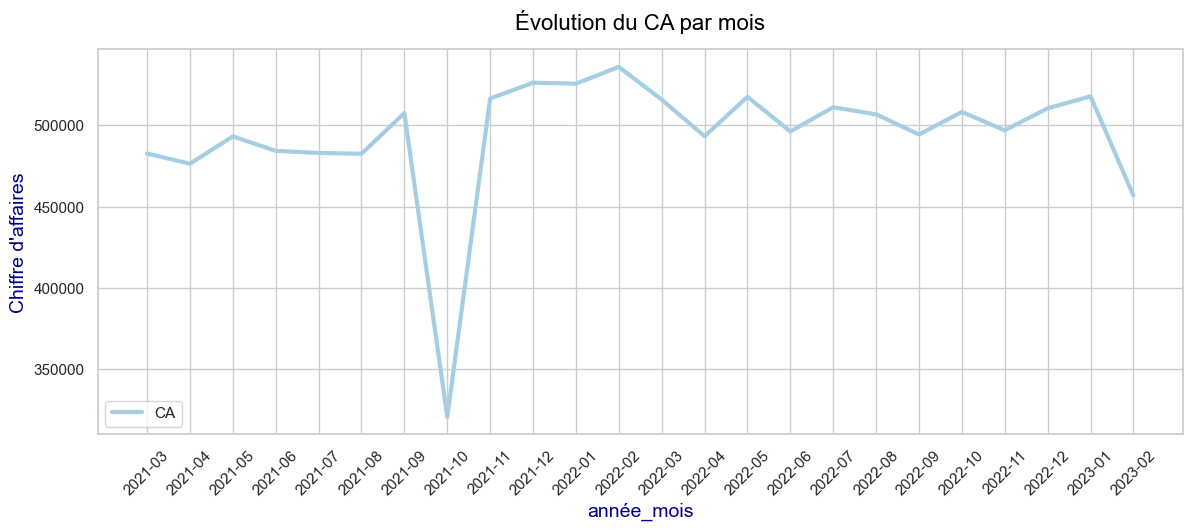

In [49]:
# Visualisation du CA par année_mois
plt.figure(figsize =(14,5 ))
plt.plot(df_ca_mensuel.année_mois, df_ca_mensuel["Chiffre d'affaire"],label='CA',linewidth=3)
plt.xlabel("année_mois", fontsize = 14, color = 'darkblue')
plt.ylabel("Chiffre d'affaires", fontsize = 14, color = 'darkblue')
plt.title('Évolution du CA par mois', fontsize = 16, color = 'black',y =1.03)
plt.legend(loc='lower left')
plt.tick_params(axis = "x", labelrotation=45)
plt.savefig(url_fig + 'Evolution_CA_mois', dpi=300, bbox_inches='tight')
plt.show()

<b>Zoom sur le mois d'octobre par catégorie/visualisation</b>

<Figure size 1000x400 with 0 Axes>

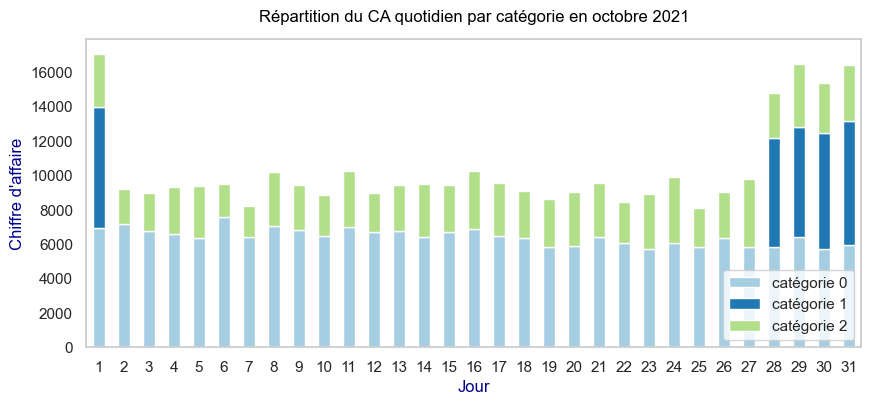

In [50]:
# Créer une dataframe pivot pour  le CA par catégorie de produit par jour pour octobre 2021.
df_oct = df.loc[ df.année_mois== "2021-10", ["jours", "price","categ"]]
df_octobre = pd.pivot_table(df_oct, index = ['jours'], columns = 'categ', values = 'price',aggfunc=np.sum)
# Visualisation de la répartition du CA par catégorie
fig = plt.figure(figsize =(10,4 ))
categories = ['catégorie 0', 'catégorie 1', 'catégorie 2']
df_octobre.plot.bar(figsize=(10,4), stacked=True, rot=0)
plt.title("Répartition du CA quotidien par catégorie en octobre 2021",fontsize = 12, color = 'black',y =1.03)
plt.xlabel("Jour", fontsize = 12, color = 'darkblue')
plt.legend(labels=categories, loc='lower right')
plt.ylabel("Chiffre d'affaire", fontsize = 12, color = 'darkblue')
plt.grid()
plt.savefig(url_fig + 'Répartition du CA d\'octobre 2021 par catégorie.png', dpi=300, bbox_inches='tight')
plt.show()

Nous observons qu'il n'y a eu aucune vente enregistrée du 02 au 27 octobre 2021 pour la catégorie 1, ce qui est probablement dû à un problème d'acquisition des données sur cette période, le phénomène ne s'est pas reproduit par ailleurs.Nous conservons cette donnée en mémoire en attendant les moyennes mobiles .

***
[Up](#Up)
<a class="anchor" id="section_3_1_1"></a>

<b>Evolution du CA global et moyennes mobiles</b>

In [51]:
# Modif format date
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.date
# Création du data par jour 
df_ca_jour = df[['date', 'price']].copy()
df_ca_jour.head()

,date,price
0,2022-05-20,4.18
1,2022-02-02,15.99
2,2022-06-18,7.99
3,2021-06-24,69.99
4,2023-01-11,4.99


In [52]:
# Groupement la somme des prix par jour
df_ca_jour = df_ca_jour.groupby('date').sum().reset_index()
df_ca_jour.head()

,date,price
0,2021-03-01,16576.95
1,2021-03-02,15498.18
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37


In [53]:
# Calcul moyenne mobile 7 jours
df_ca_jour['moyenne_mobile_7'] = df_ca_jour['price'].rolling(7,min_periods=1).mean()
df_ca_jour.head(1)

,date,price,moyenne_mobile_7
0,2021-03-01,16576.95,16576.95


In [54]:
# Calcul moyenne mobile 30 jours
df_ca_jour['moyenne_mobile_30'] = df_ca_jour['price'].rolling(30,min_periods=1).mean()
df_ca_jour.head()

,date,price,moyenne_mobile_7,moyenne_mobile_30
0,2021-03-01,16576.95,16576.95,16576.95
1,2021-03-02,15498.18,16037.56,16037.56
2,2021-03-03,15198.69,15757.94,15757.94
3,2021-03-04,15196.07,15617.47,15617.47
4,2021-03-05,17471.37,15988.25,15988.25


In [55]:
# Création du data par année_mois
df_année_mois = df[['année_mois', 'price']].copy()
df_année_mois.head()

,année_mois,price
0,2022-05,4.18
1,2022-02,15.99
2,2022-06,7.99
3,2021-06,69.99
4,2023-01,4.99


In [56]:
# Grouper la somme des prix par mois
df_année_mois = df_année_mois.groupby('année_mois').sum().reset_index()
df_année_mois.head()

,année_mois,price
0,2021-03,482546.16
1,2021-04,476273.48
2,2021-05,493037.29
3,2021-06,484170.65
4,2021-07,482882.31


In [57]:
# Calcul de la moyenne mobile sur 3 mois
df_année_mois_1 = df_année_mois
df_année_mois_1['moyenne_mobile'] = df_année_mois_1['price'].rolling(3,min_periods=1).mean()
df_année_mois_1.head()

,année_mois,price,moyenne_mobile
0,2021-03,482546.16,482546.16
1,2021-04,476273.48,479409.82
2,2021-05,493037.29,483952.31
3,2021-06,484170.65,484493.81
4,2021-07,482882.31,486696.75


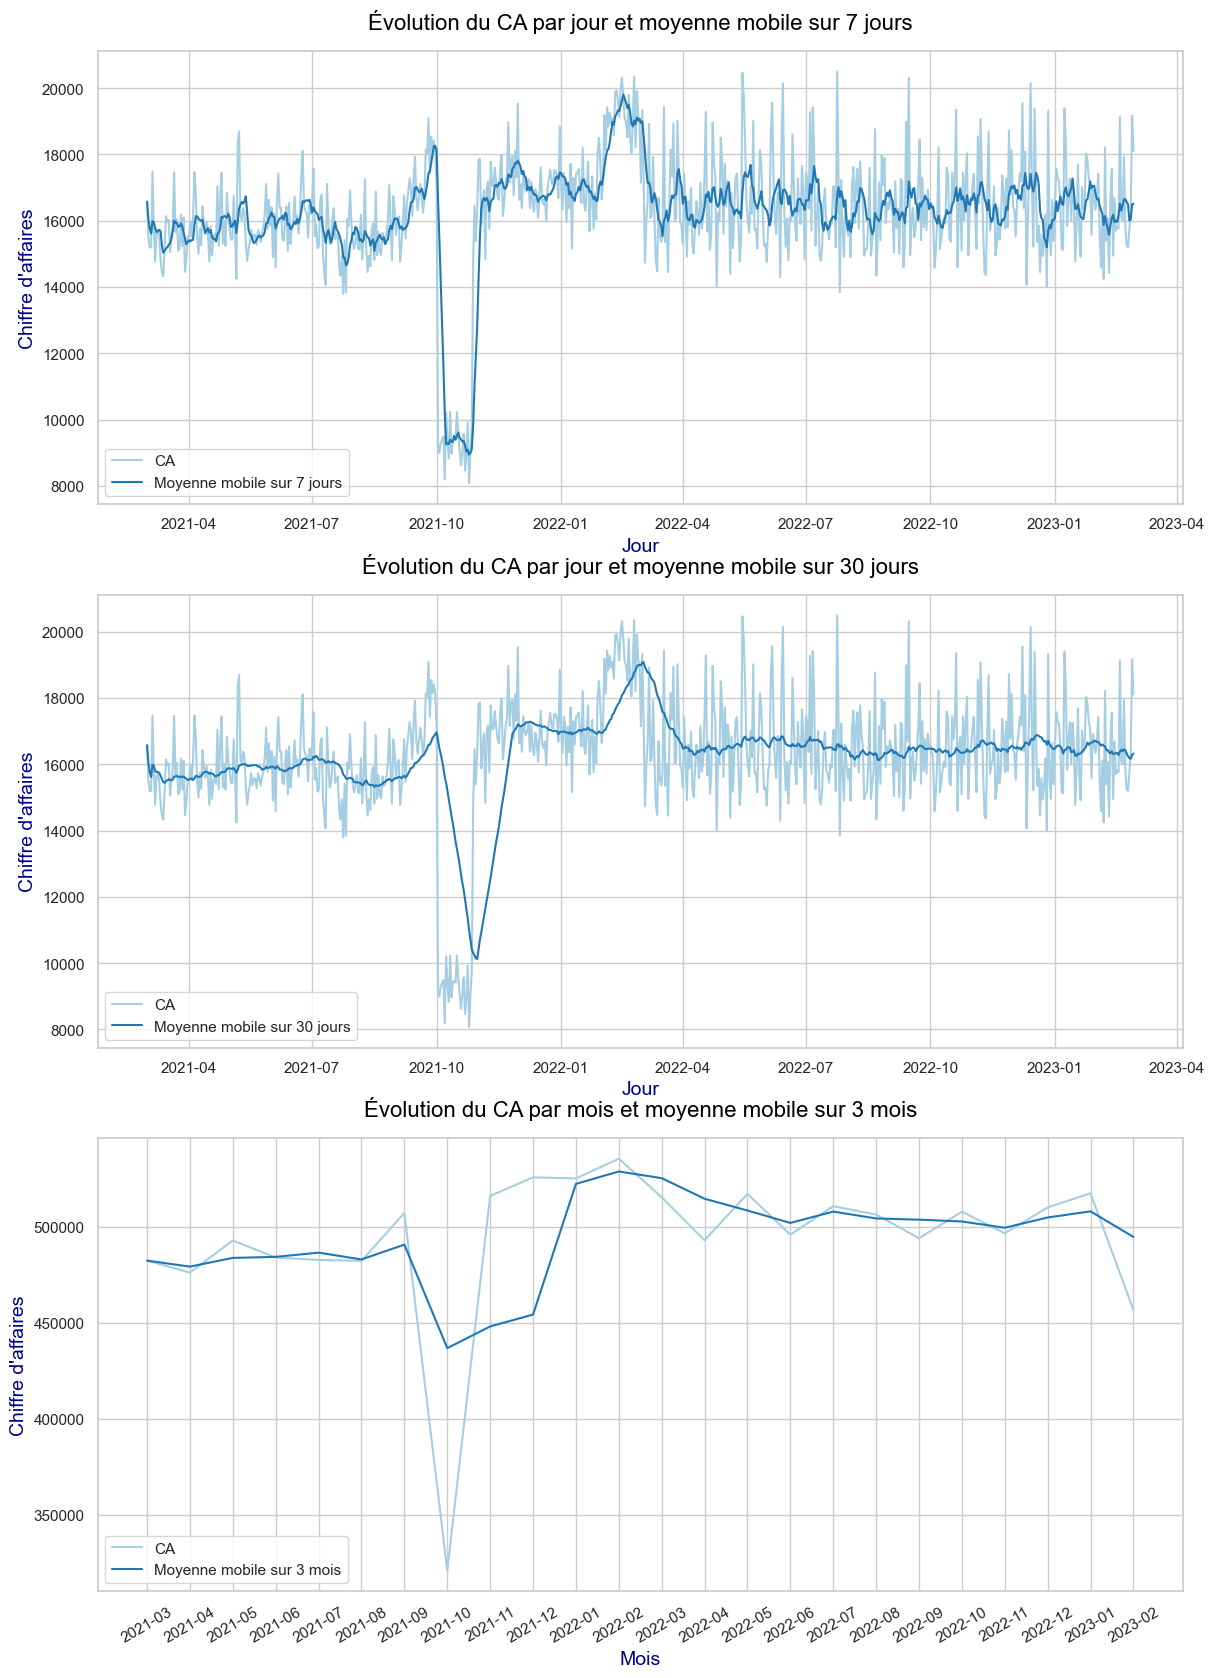

In [58]:
plt.figure(figsize =(14,20 ))

# Visualisation de l'évolution du CA par jour et de la moyenne mobile sur 7 jours
ax1 = plt.subplot(3,1,1)
plt.plot(df_ca_jour.date, df_ca_jour.price,label='CA' )
plt.plot(df_ca_jour.date, df_ca_jour.moyenne_mobile_7 ,label='Moyenne mobile sur 7 jours',linewidth=(1.5))
         
plt.xlabel("Jour", fontsize = 14, color = 'darkblue')
plt.ylabel("Chiffre d'affaires", fontsize = 14, color = 'darkblue')
plt.title('Évolution du CA par jour et moyenne mobile sur 7 jours', fontsize = 16, color = 'black',y =1.03)
plt.legend(loc='lower left')

# Visualisation l'évolution du CA par jour et de la moyenne mobile sur 30 jours
ax2 = plt.subplot(3,1,2)
plt.plot(df_ca_jour.date, df_ca_jour.price,label='CA' )
plt.plot(df_ca_jour.date, df_ca_jour.moyenne_mobile_30 ,label='Moyenne mobile sur 30 jours',linewidth=(1.5) )

plt.xlabel("Jour", fontsize = 14, color = 'darkblue')
plt.ylabel("Chiffre d'affaires", fontsize = 14, color = 'darkblue')
plt.title('Évolution du CA par jour et moyenne mobile sur 30 jours', fontsize = 16, color = 'black',y =1.03)
plt.legend(loc='lower left')

# Visualisation de l'évolution du CA par mois et de la moyenne mobile sur 3 mois
ax3 = plt.subplot(3,1,3)
plt.plot(df_année_mois_1.année_mois, df_année_mois_1.price,label='CA' )
plt.plot(df_année_mois_1.année_mois, df_année_mois_1.moyenne_mobile ,label='Moyenne mobile sur 3 mois',linewidth=(1.5) )

plt.xlabel("Mois", fontsize = 14, color = 'darkblue')
plt.ylabel("Chiffre d'affaires", fontsize = 14, color = 'darkblue')
plt.title('Évolution du CA par mois et moyenne mobile sur 3 mois', fontsize = 16, color = 'black',y =1.03)
plt.legend(loc='lower left')
plt.tick_params(axis = "x", labelrotation=30)
plt.savefig(url_fig + 'Moyennes_mobiles_par_7_jours_30_jours_3_mois.png', dpi=300, bbox_inches='tight')
plt.show()

Conclusion series temporelles:   
   * Nous constatons qu'après le démarrage de l'activité en ligne en mars 2021 et un CA stable jusqu'en octobre 2021 ou reste une chute de CA sur la catégorie 1 inexpliquée, nous sommes revenus sur un CA stable depuis 2022 avec un ca moyen mensuel de 500 000 €.   
   * <b>Afin de conserver une cohérence dans la poursuite de notre analyse notamment sur les catégories, nous supprimons le mois d'octobre 2021 de notre df.</b>  

In [59]:
# Suppression des données du mois d'octobre
df = df[df['année_mois'] != '2021-10']
df.head(2)

,id_prod,date,session_id,client_id,année,mois,année_mois,jours,heure,sex,âge,price,categ
0,0_1518,2022-05-20,s_211425,c_103,2022,5,2022-05,20,13,f,37,4.18,0
1,1_251,2022-02-02,s_158752,c_8534,2022,2,2022-02,2,7,m,35,15.99,1


In [60]:
df_ca_total = df['price'].sum()
df_vol_total = df["session_id"].count()
Pmoyentot= round((df_ca_total/df_vol_total),2)
print('Après suppression du mois d\'octobre 2021, les nouvelles données sont:')
print("le chiffre d'affaire global est égal à", df_ca_total," €")
print("le volume global des ventes est égal à", df_vol_total,"ventes")
print("le prix moyen est de", Pmoyentot," €")

Après suppression du mois d'octobre 2021, les nouvelles données sont:
le chiffre d'affaire global est égal à 11535439.577964488  €
le volume global des ventes est égal à 657726 ventes
le prix moyen est de 17.54  €


***
[Up](#Up)
<a class="anchor" id="section_3_1_2"></a>

<b>Saisonalité</b>

Réalisation d'une étude de saisonalité par jour de semaine
   * uniquement sur 2022 car nous avons supprimé oct 2021
   *<b> A noter que la période étant courte, cela reste à titre informatif.</b> 

In [61]:
# Création du df 'df_2022'pour l'analyse
df_2022 = df.loc[df['année']==2022]

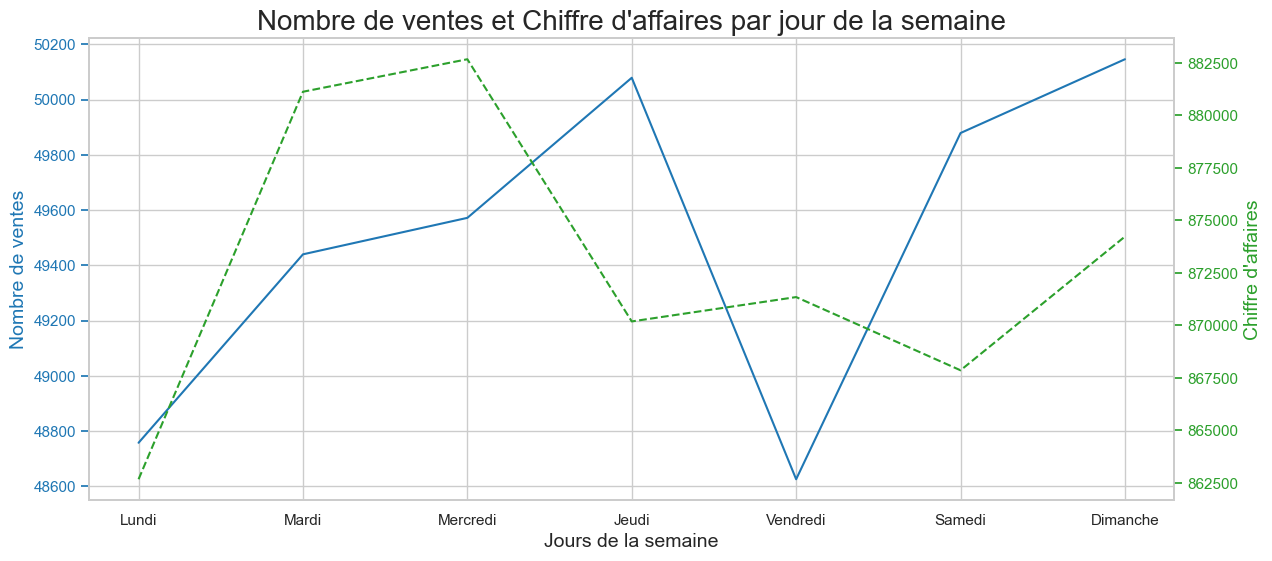

In [62]:
# Données pour l'axe des jours de la semaine
jours = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
df_2022['jour_semaine'] = pd.to_datetime(df_2022['date']).dt.day_name()
freq_ventes = df_2022.groupby('jour_semaine').count()['id_prod']
ca_jour = df_2022.groupby('jour_semaine').sum()['price']

fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(jours, freq_ventes, label='Nombre de ventes', color='tab:blue') 
ax1.set_xlabel('Jours de la semaine', fontsize=14)
ax1.set_ylabel('Nombre de ventes', color='tab:blue', fontsize=14)
ax1.tick_params('y', colors='tab:blue')

ax2 = ax1.twinx()
ax2.plot(jours, ca_jour, label='Chiffre d\'affaires', linestyle='dashed', color='tab:green') 
ax2.set_ylabel('Chiffre d\'affaires', color='tab:green', fontsize=14)
ax2.tick_params('y', colors='tab:green')

plt.title('Nombre de ventes et Chiffre d\'affaires par jour de la semaine', fontsize=20)
plt.grid()
plt.savefig(url_fig + 'Nombre de ventes et Chiffre d\'affaires par jour de la semaine.png', dpi=300, bbox_inches='tight')
plt.show()


***
[Up](#Up)
<a class="anchor" id="section_3_1_3"></a>

<b>Zoom sur les références & répartition par catégories</b>

In [63]:
# Répartition du CA par catégorie
# Grouper la somme des prix par catégorie
df_categ =  df.groupby("categ")[['price']].sum().reset_index()
df_categ.rename(columns={'price': "Chiffre d'affaire"})
df_categ

,categ,price
0,0,4222989.78
1,1,4619960.37
2,2,2692489.43


In [64]:
# Répartition du nombre de ventes par catégorie
nbr_categ= df.groupby("categ")[['session_id']].count().reset_index()
nbr_categ.rename(columns={"session_id": "nbre_ventes"})
nbr_categ

,categ,session_id
0,0,396911
1,1,225503
2,2,35312


In [65]:
# Moyenne du prix de vente par catégorie
moy_categ = df.groupby("categ")[['price']].mean().reset_index()
moy_categ

,categ,price
0,0,10.64
1,1,20.49
2,2,76.25


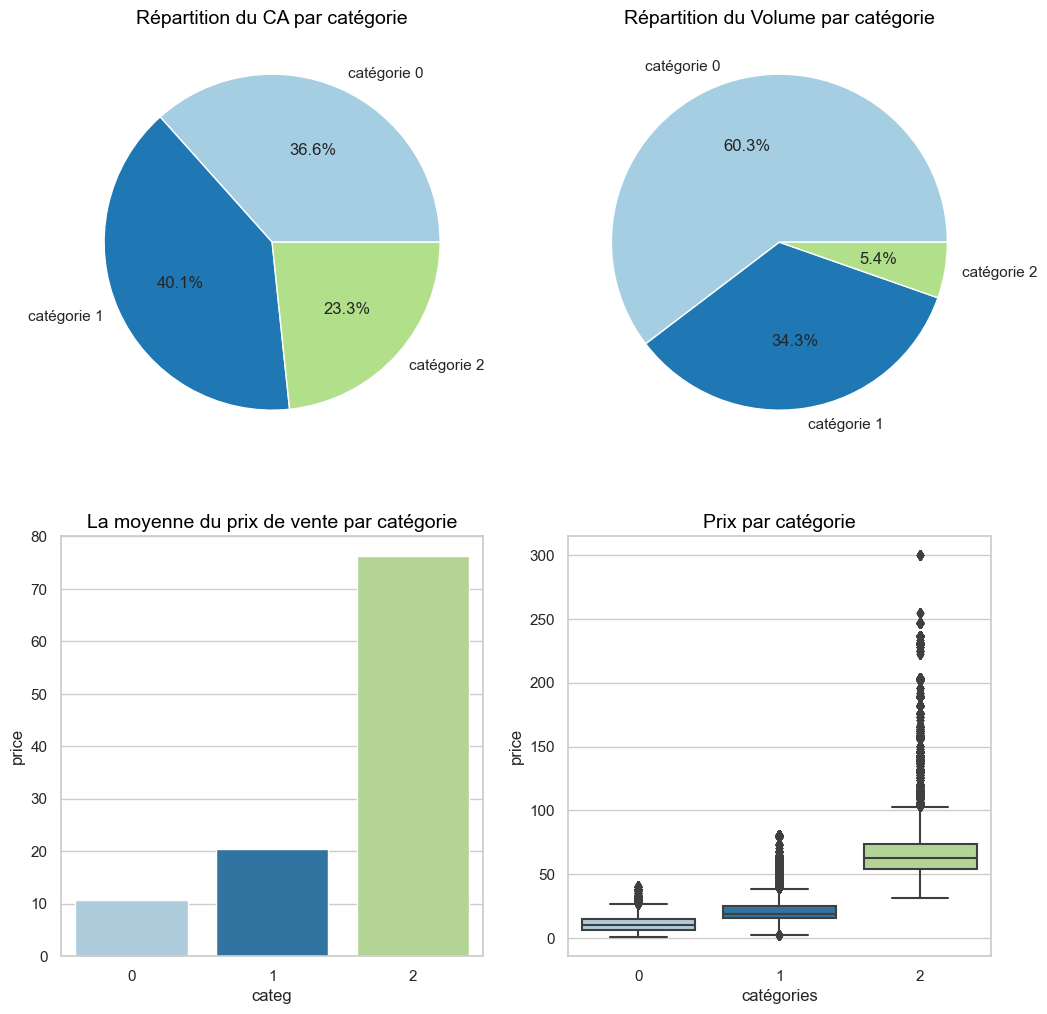

In [66]:
# Visualisation de la répartition du CA par catégorie 
categories = ['catégorie 0', 'catégorie 1', 'catégorie 2']
fig = plt.figure(figsize =(12,12 ))

ax1 = plt.subplot(2,2,1)
patches, l_text, p_text=plt.pie(x= df_categ['price'], labels = categories, autopct='%1.1f%%')
plt.title('Répartition du CA par catégorie', fontsize = 14, color = 'black')

# Visualisation de la répartition du Vol par catégorie
ax2 = plt.subplot(2,2,2)
patches, l_text, p_text=plt.pie(x= nbr_categ['session_id'], labels = categories, autopct='%1.1f%%')
plt.title('Répartition du Volume par catégorie', fontsize = 14, color = 'black')

# Visualisation de la moyenne du prix par catégories
ax3 = plt.subplot(2,2,3)
sns.barplot(x='categ', y = 'price', data = moy_categ)
plt.title('La moyenne du prix de vente par catégorie', fontsize = 14, color = 'black')

# Visualisation du prix par catégorie
ax4 = plt.subplot(2,2,4)
sns.boxplot(data=df, x="categ", y="price")
plt.title('Prix par catégorie',fontsize = 14, color = 'black')
plt.xlabel('catégories')
plt.ylabel('price')
plt.savefig(url_fig + 'Repartion_CA_Vol_categorie_PM_categ_price', dpi=300, bbox_inches='tight')

<b>Conclusions:</b>

   - la catégorie 0 est la moins chère avec un prix moyen de 10,64 €, elle répresente plus de 60 % des ventes en volume.
   - La catégorie 1  est leader en CA d'une courte tête avec 39,3 % du total devant la catégorie 0 à 37,3% .(ne pas oublier la      perte de CA de la catégorie 1 en octobre 2021.
   - Enfin la catégorie 2  avec le plus fort prix moyen à 76,2 € représente quand même 23,4 % du CA et pourrait être mieux
     travaillée car on note de nombreux faux outliers sur le dernier graphique qui dénote un étagement de prix à revoir.

***
[Up](#Up)
<a class="anchor" id="section_3_1_4"></a>

<b>Zoom sur les tops & flops</b>  

In [67]:
# Top 10 des références en CA 
df_top_ca = df.groupby(['id_prod'])['price'].sum().reset_index()
df_top_ca10 = df_top_ca.sort_values('price', ascending=False).head(10)
df_top_ca10 = df_top_ca10.rename(columns={"price": "CA"})
df_top_ca10

,id_prod,CA
3095,2_159,92265.68
3069,2_135,67403.23
3044,2_112,62840.10
3033,2_102,58962.58
3151,2_209,55362.09
2618,1_395,53950.39
2590,1_369,53665.63
3042,2_110,51916.50
2640,1_414,51615.78
3200,2_39,51147.18


In [68]:
ca10 = 100*df_top_ca10.CA.sum()/df.price.sum()
print ("Le top 10 produits représente ", round(ca10,2), "% du CA total.")

Le top 10 produits représente  5.19 % du CA total.


In [69]:
# Top 10 des références en volume
df_top_vol = df.groupby(['id_prod'])['session_id'].count().reset_index()
df_top_vol10 =df_top_vol.sort_values('session_id', ascending=False).head(10)
df_top_vol10 = df_top_vol10.rename(columns={"session_id": "nbre_ventes"})
df_top_vol10

,id_prod,nbre_ventes
2590,1_369,2237
2643,1_417,2173
2640,1_414,2166
2732,1_498,2117
2652,1_425,2084
2628,1_403,1950
2638,1_412,1938
2639,1_413,1931
2631,1_406,1931
2632,1_407,1923


In [70]:
nb10 = 100*df_top_vol10.nbre_ventes.sum()/ 679332
print ("Le top 10 produits représente ", round(nb10,2), "% du Vol total.")

Le top 10 produits représente  3.01 % du Vol total.


<b>Visualisation</b>

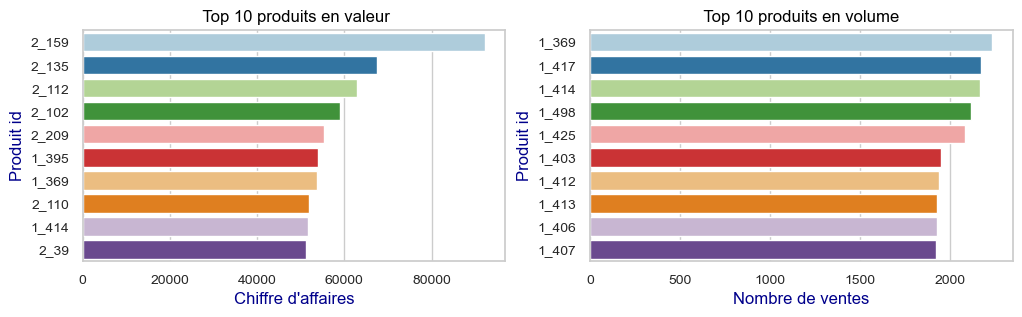

In [71]:
fig = plt.figure(figsize =(12,3))
plt.subplots_adjust(hspace=1)
# Visualisation du Top 10 en valeur
ax1 =  plt.subplot(1,2,1)
sns.barplot(x='CA', y = 'id_prod', data = df_top_ca10  )
plt.xlabel("Chiffre d'affaires",fontsize = 12, color = 'darkblue')
plt.ylabel("Produit id", fontsize = 12, color = 'darkblue')
plt.title(" Top 10 produits en valeur", fontsize = 12, color = 'black')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Visualisation du Top 10 en volume
ax2 = plt.subplot(1,2,2)
sns.barplot(x='nbre_ventes', y = 'id_prod', data = df_top_vol10  )
plt.xlabel("Nombre de ventes",fontsize = 12, color = 'darkblue')
plt.ylabel("Produit id", fontsize = 12, color = 'darkblue')
plt.title(" Top 10 produits en volume ", fontsize = 12, color = 'black')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.savefig(url_fig + 'top10produit_VolVal', dpi=300, bbox_inches='tight')

In [72]:
# Flop 10 des références en CA 
df_flop_ca = df.groupby(['id_prod'])['price'].sum().reset_index()
df_flop_ca = df_flop_ca.sort_values('price', ascending=True)
flop_ca = len(df_flop_ca[df_flop_ca['price'] <= 100])
print('Nous avons', flop_ca, 'références de livres qui ont généré moins de 100 € sur une période de 2 ans.')

Nous avons 416 références de livres qui ont généré moins de 100 € sur une période de 2 ans.


In [73]:
# Flop 10 des références en CA 
df_flop_ca = df.groupby(['id_prod'])['price'].sum().reset_index()
df_flop_ca = df_flop_ca.sort_values('price', ascending=True).head(10)

In [74]:
# Flop des références en volume
flop_volume=df.groupby(['id_prod'])['session_id'].count().reset_index()
flop_vol=flop_volume.sort_values('session_id', ascending=True)
sum_flop = len(flop_vol[flop_vol['session_id'] <= 5])
print('Nous avons', sum_flop, 'références de livres qui ne se sont vendues que 5 fois ou moins sur une période de 2 ans.')

Nous avons 232 références de livres qui ne se sont vendues que 5 fois ou moins sur une période de 2 ans.


In [75]:
# Flop 10 des références en volume
df_flop_vol = df.groupby(['id_prod'])['session_id'].count().reset_index()
df_flop_vol10 =df_flop_vol.sort_values('session_id', ascending=True).head(10)
df_flop_vol10

,id_prod,session_id
2270,0_980,1
3174,2_23,1
588,0_1533,1
313,0_1284,1
2165,0_886,1
3246,2_81,1
1791,0_549,1
1783,0_541,1
664,0_1601,1
751,0_1683,1


<b>Conclusions:</b>

   - Le top 10 produits représente  5.19 % du CA total et 3.01 % du volume total.
   - il faut noter le nombre de références qui ne sont pas 'rentables' 232 références ne se sont vendues que 5 fois maximum en 2 ans et 416 références ont généré moins de 100 € sur 2 ans.La gestion de ces références n'est pas rentable et on ne peut les garder que dans le cadre d'une politique voulant mettre en avant une offre la plus large possible.

***
[Up](#Up)
<a class="anchor" id="section_3_2"></a>

<b>Profil Clients: Courbe de lorenz</b>


   * <u>La courbe de Lorenz</u> est une représentation graphique permettant de visualiser la distribution d'une variable (actif, patrimoine, revenu, etc.) au sein d'une population.Elle permet de représenter la fonction de répartition qui associe à chaque fractile de population la part de richesse détenue par celui-ci. Autrement dit, elle représente combien la part X d'une population détient de part Y d'une variable.    
   <>
   * <u>Le coefficient de Gini, ou indice de Gini,</u> est une mesure statistique permettant de rendre compte de la répartition d'une variable au sein d'une population. Autrement dit, il mesure le niveau d'inégalité de la répartition d'une variable dans la population.L’indice (ou coefficient) de Gini est un indicateur synthétique d’inégalités.Il varie entre 0 et 1.Il est égal à 0 dans une situation d’égalité parfaite et 1 dans une situation la plus inégalitaire possible.Entre 0 et 1, l’inégalité est d’autant plus forte que l’indice de Gini est élevé.

***
[Up](#Up)
<a class="anchor" id="section_3_2_1"></a>

<b>Distribution du Chiffre d'affaire par client</b>

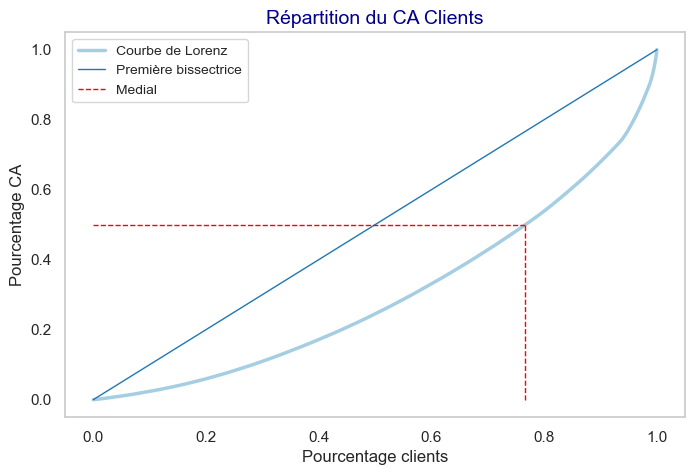

In [76]:
# Courbe de Lorenz pour le fichier client (df)
n_client_df = len(df)
ca_c_df = df['price'].values
lorenz_df = np.cumsum(np.sort(ca_c_df)) / ca_c_df.sum()
lorenz_df = np.append([0],lorenz_df) # La courbe de Lorenz commence à 0
medial = lorenz_df[(lorenz_df < 0.5)].size / lorenz_df.size # Calcul de l'intersection
xaxis = np.linspace(0-1/n_client_df,1+1/n_client_df,len(lorenz_df)) 

plt.figure(figsize =(8,5))
plt.plot(xaxis,lorenz_df,drawstyle='steps-post',label = 'Courbe de Lorenz',linewidth=2.5)
plt.plot([0,1], [0,1], label = 'Première bissectrice',linewidth=1) #tracer la bisséctrice

plt.vlines(medial, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1,label='Medial')
plt.hlines(xmin=medial, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)
plt.title('Répartition du CA Clients',fontsize = 14, color = 'darkblue')
plt.xlabel('Pourcentage clients', fontsize=12)
plt.ylabel('Pourcentage CA', fontsize=12) 
plt.legend(loc='upper left', fontsize=10)
plt.grid()
plt.savefig(url_fig + 'Courbe_de_lorentz_df.png', dpi=300, bbox_inches='tight')
plt.show()

In [77]:
# Calcul de l'indice de Gini
AUC_df = (lorenz_df.sum() -lorenz_df[-1]/2 -lorenz_df[0]/2)/n_client_df # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S_df = 0.5 - AUC_df # surface entre la première bissectrice et le courbe de Lorenz
gini_df = 2*S_df
print('Le coefficient de Gini de Clients est de:', round(gini_df,3))

Le coefficient de Gini de Clients est de: 0.394


Nous constatons sur la graphique de la courbe de Lorenz que la repartition n'est pas égalitaire avec une cassure de la courbe à partir de 90 % des clients , ce qui semble indiquer qu'une partie du CA se fait sur peu de clients. De plus l'indice de Gini de 0.394 indique bien cette répartition inégalitaire. 

#### Zoom sur la répartition du CA par clients

In [78]:
# Repartition du CA par clients
df_ca_clients = df.groupby(['client_id',])[['price']].sum().sort_values('price', ascending=False)
df_ca_clients = df_ca_clients.rename(columns={"price":"CA"})
df_ca_clients = df_ca_clients.head(10)

# Volume par clients
df_vol_clients = df.groupby(['client_id'])[['session_id']].count().sort_values('session_id', ascending=False)
df_vol_clients = df_vol_clients.rename(columns={"session_id":"volume"})
df_vol_clients.head(10)

# Concaténation horizontale des deux dataframes
df_resultat = pd.concat([df_ca_clients, df_vol_clients], axis=1)

# Affichage du résultat
print(df_resultat.head(10))

                 CA  volume
client_id                  
c_1609    312755.08   24472
c_4958    282654.61    5090
c_6714    149854.11    8903
c_3454    111801.89    6635
c_2899      5214.05     105
c_1570      5136.14     356
c_3263      5129.89     392
c_7319      5120.55     368
c_8026      4981.14     368
c_5263      4964.87      96


Nous constatons que nous avons 4 clients qui, au vu de leur CA et volume d'achat ne peuvent être des clients particuliers.
il peut s'agir de clients du type bibliothèques,libraires ou revendeurs. Nous dissocions donc notre df en ajoutant une variable 'type' où nous classons les 4 gros clients en B2B(business) et les autres clients en B2C (consumer).

In [79]:
# création df_business
df_business = df.groupby('client_id')['price'].sum().reset_index()
df_business = df_business.sort_values('price',ascending=False).head(4)
df_business

,client_id,price
677,c_1609,312755.08
4387,c_4958,282654.61
6336,c_6714,149854.11
2723,c_3454,111801.89


In [80]:
# Ajout d'une colonne 'type' pour différencier les clients B2B et B2C
business = ['c_1609', 'c_4958', 'c_6714', 'c_3454'] # Liste des client_id B2B
df.loc[df['client_id'].isin(business), 'type'] = 'B2B'
df['type'].fillna('B2C', inplace=True) # Tous les autres clients sont considérés comme des B2C
# On en profite pour créer une variable classe d'âge dans le même temps
# A noter que les clients B2B sont considérés comme sans âge ni sexe. 
df['classe_age'] = '18-30'
df['classe_age'].loc[df[df['âge']>=30].index] = '30-40'
df['classe_age'].loc[df[df['âge']>=40].index] = '40-50'
df['classe_age'].loc[df[df['âge']>=50].index] = '50-60'
df['classe_age'].loc[df[df['âge']>=60].index] = '60-70'
df['classe_age'].loc[df[df['âge']>=70].index] = '70-80'
df['classe_age'].loc[df[df['âge']>=80].index] = '80 & +'
df.head()

,id_prod,date,session_id,client_id,année,mois,année_mois,jours,heure,sex,âge,price,categ,type,classe_age
0,0_1518,2022-05-20,s_211425,c_103,2022,5,2022-05,20,13,f,37,4.18,0,B2C,30-40
1,1_251,2022-02-02,s_158752,c_8534,2022,2,2022-02,2,7,m,35,15.99,1,B2C,30-40
2,0_1277,2022-06-18,s_225667,c_6714,2022,6,2022-06,18,15,f,55,7.99,0,B2B,50-60
3,2_209,2021-06-24,s_52962,c_6941,2021,6,2021-06,24,4,m,23,69.99,2,B2C,18-30
4,0_1509,2023-01-11,s_325227,c_4232,2023,1,2023-01,11,8,m,43,4.99,0,B2C,40-50


In [81]:
# Création de 2 data B2B & B2C
b2b = df[df['type']=='B2B']
b2c = df[df['type']=='B2C']

In [82]:
# Calcul du CA B2B
CA_clients_b2b = 100 * df_resultat.head(4).CA.sum() / df.price.sum()
# Calcul du volume B2B
Vol_clients_b2b = 100 * df_resultat.head(4).volume.sum() / df.session_id.count()

print ("les clients B2B représentent", round(CA_clients_b2b,2), "% du CA total.")
print ("les clients B2B représentent", round(Vol_clients_b2b,2), "% du Volume total.")

les clients B2B représentent 7.43 % du CA total.
les clients B2B représentent 6.86 % du Volume total.


<b>Poursuite de l'analyse avec calcul de la répartition du chiffre d'affaire pour les clients B2B: Courbe de Lorenz & Indice de Gini</b>

In [83]:
# Calcul CA B2B
ca_b2b=b2b.groupby(['client_id',])[['price']].sum().sort_values('price', ascending=False)
ca_b2b

,price
client_id,
c_1609,312755.08
c_4958,282654.61
c_6714,149854.11
c_3454,111801.89


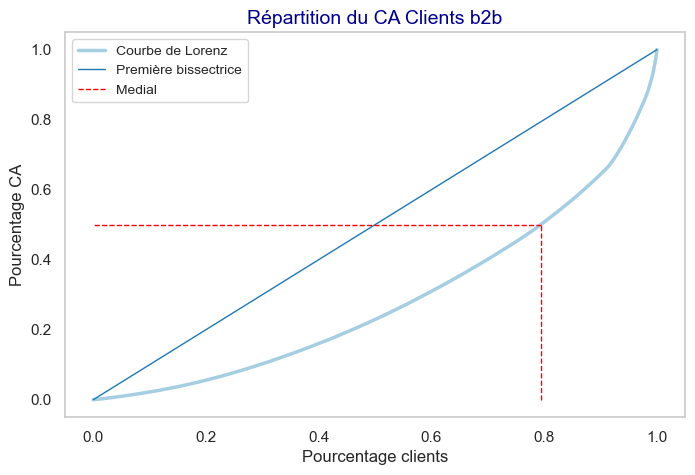

In [84]:
# Courbe de Lorenz pour les clients B2B
n_client_b2b = len(b2b)
ca_c_b2b = b2b['price'].values
lorenz_b2b = np.cumsum(np.sort(ca_c_b2b)) / ca_c_b2b.sum()
lorenz_b2b = np.append([0],lorenz_b2b) # La courbe de Lorenz commence à 0
medial = lorenz_b2b[(lorenz_b2b < 0.5)].size / lorenz_b2b.size # Calcul de l'intersection
xaxis = np.linspace(0-1/n_client_b2b,1+1/n_client_b2b,len(lorenz_b2b)) 

plt.figure(figsize =(8,5))
plt.plot(xaxis,lorenz_b2b,drawstyle='steps-post',label = 'Courbe de Lorenz',linewidth=2.5)
plt.plot([0,1], [0,1], label = 'Première bissectrice',linewidth=1) #tracer la bisséctrice

plt.vlines(medial, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1,label='Medial')
plt.hlines(xmin=medial, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)
plt.title('Répartition du CA Clients b2b',fontsize = 14, color = 'darkblue')
plt.xlabel('Pourcentage clients', fontsize=12)
plt.ylabel('Pourcentage CA', fontsize=12) 
plt.legend(loc='upper left', fontsize=10)
plt.grid()
plt.savefig(url_fig + 'Courbe de lorentz B2B.png', dpi=300, bbox_inches='tight')
plt.show()

In [85]:
# Calcul de l'indice de Gini b2b
AUC_b2b = (lorenz_b2b.sum() -lorenz_b2b[-1]/2 -lorenz_b2b[0]/2)/n_client_b2b # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S_b2b = 0.5 - AUC_b2b # surface entre la première bissectrice et le courbe de Lorenz
gini_b2b = 2*S_b2b
print('Le coefficient de Gini dec Clients B2B est de:', round(gini_b2b,3))

Le coefficient de Gini dec Clients B2B est de: 0.425


L'indice de Gini (0.425) et la courbe de Lorenz marquent une répartition encore plus inégalitaire pour ces 4 clients. 50 % du CA est réalisé par 80 % des clients

<b>Pour finir: nous plaçons les courbes de lorenz des fichiers df, b2b et b2c sur le même graphique à titre comparatif</b>

Le coefficient de Gini de Clients est de: 0.394
Le coefficient de Gini dec Clients B2C est de: 0.392
Le coefficient de Gini dec Clients B2B est de: 0.425


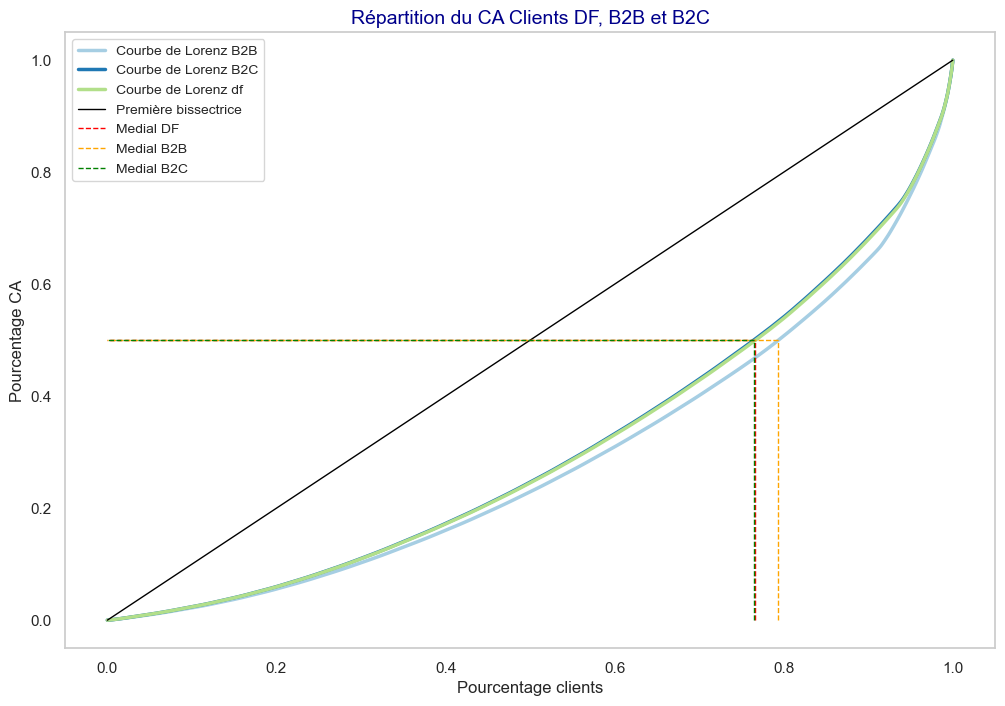

In [86]:
# Courbe de Lorenz pour les clients df
n_client_df = len(df)
ca_c_df = df['price'].values
lorenz_df = np.cumsum(np.sort(ca_c_df)) / ca_c_df.sum()
lorenz_df = np.append([0], lorenz_df) # La courbe de Lorenz commence à 0
medial_df = lorenz_df[(lorenz_df < 0.5)].size / lorenz_df.size # Calcul de l'intersection
xaxis_df = np.linspace(0-1/n_client_df, 1+1/n_client_df, len(lorenz_df)) 

# Courbe de Lorenz pour les clients B2B
n_client_b2b = len(b2b)
ca_c_b2b = b2b['price'].values
lorenz_b2b = np.cumsum(np.sort(ca_c_b2b)) / ca_c_b2b.sum()
lorenz_b2b = np.append([0], lorenz_b2b) # La courbe de Lorenz commence à 0
medial_b2b = lorenz_b2b[(lorenz_b2b < 0.5)].size / lorenz_b2b.size # Calcul de l'intersection
xaxis_b2b = np.linspace(0-1/n_client_b2b, 1+1/n_client_b2b, len(lorenz_b2b)) 

# Courbe de Lorenz pour les clients B2C 
n_client_b2c = len(b2c)
ca_c_b2c = b2c['price'].values
lorenz_b2c = np.cumsum(np.sort(ca_c_b2c)) / ca_c_b2c.sum()
lorenz_b2c = np.append([0], lorenz_b2c) # La courbe de Lorenz commence à 0
medial_b2c = lorenz_b2c[(lorenz_b2c < 0.5)].size / lorenz_b2c.size # Calcul de l'intersection
xaxis_b2c = np.linspace(0-1/n_client_b2c, 1+1/n_client_b2c, len(lorenz_b2c)) 

# Calcul de l'indice de Gini B2C
AUC_b2c = (lorenz_b2c.sum() -lorenz_b2c[-1]/2 -lorenz_b2c[0]/2)/n_client_b2c # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S_b2c = 0.5 - AUC_b2c # surface entre la première bissectrice et le courbe de Lorenz
gini_b2c = 2*S_b2c

# Tracer les courbes de Lorenz sur le même graphique
plt.figure(figsize=(12, 8))
plt.plot(xaxis_b2b, lorenz_b2b, drawstyle='steps-post', label='Courbe de Lorenz B2B', linewidth=2.5)
plt.plot(xaxis_b2c, lorenz_b2c, drawstyle='steps-post', label='Courbe de Lorenz B2C', linewidth=2.5) 
plt.plot(xaxis_df, lorenz_df, drawstyle='steps-post', label='Courbe de Lorenz df', linewidth=2.5) 
plt.plot([0, 1], [0, 1], label='Première bissectrice', linewidth=1, color='black') #tracer la bisséctrice

plt.vlines(medial_df, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1, label='Medial DF')
plt.hlines(xmin=medial_df, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)
plt.vlines(medial_b2b, ymin=0, ymax=.5, color='orange', linestyle='--', linewidth=1, label='Medial B2B')
plt.hlines(xmin=medial_b2b, xmax=0, y=.5, color='orange', linestyle='--', linewidth=1)
plt.vlines(medial_b2c, ymin=0, ymax=.5, color='green', linestyle='--', linewidth=1, label='Medial B2C') 
plt.hlines(xmin=medial_b2c, xmax=0, y=.5, color='green', linestyle='--', linewidth=1) 

plt.title('Répartition du CA Clients DF, B2B et B2C', fontsize=14, color='darkblue')
plt.xlabel('Pourcentage clients', fontsize=12)
plt.ylabel('Pourcentage CA', fontsize=12) 
plt.savefig(url_fig + 'les_3_Courbes_lorentz.png', dpi=300, bbox_inches='tight')
plt.legend(loc='upper left', fontsize=10)
plt.grid()
print('Le coefficient de Gini de Clients est de:', round(gini_df,3))
print('Le coefficient de Gini dec Clients B2C est de:', round(gini_b2c,3))
print('Le coefficient de Gini dec Clients B2B est de:', round(gini_b2b,3))
plt.savefig(url_fig + 'courbe_lorenz_3.png', dpi=300, bbox_inches='tight')

<b>Conclusions:</b>    
   * Les courbes de Lorenz sont très proches notamment celles du b2c et du df avec des indices de Gini de 0.392 et 0.394.
   * la courbe de lorenz du B2B, avec un indice de gini de 0.425 est la plus inégalitaire: 80 % des clients réalisent 50 % du CA, sachant qu'ils sont 4 clients, cela signifie qu'un client réalise à lui seul les 50 % restants.

***
[Up](#Up)
<a class="anchor" id="section_3_2_2"></a>

<b>Distribution du Chiffre d'affaire par âge des clients</b>

<b>nb:(les client B2B sont exclus de cette rubrique non concernés par l'âge ou le genre)</b>

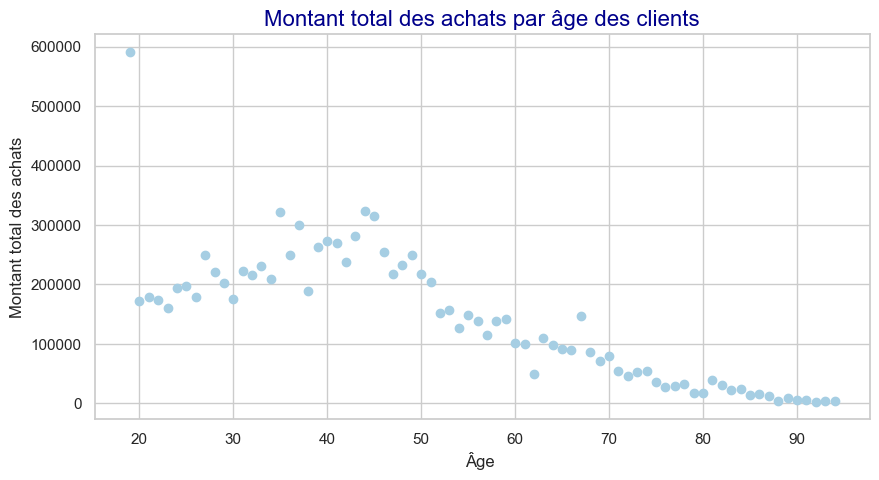

In [87]:
# Création du df avec âge & CA
df_age_ca = b2c.groupby('âge')['price'].agg(['count', 'sum']).sort_values('sum', ascending=False).reset_index()
# Visualisation de CA en fonction d'âge des clients
plt.figure(figsize=(10, 5))
plt.scatter(df_age_ca['âge'],df_age_ca['sum'])
plt.ylabel('Montant total des achats')
plt.xlabel('Âge ')
plt.savefig(url_fig + 'Montant_achats_b2c.png', dpi=300, bbox_inches='tight')
plt.title("Montant total des achats par âge des clients",fontsize= 16, color = 'darkblue')
plt.show()

In [88]:
# Volume t valeur par âge des clients
df_age_ca.head()# on peut noter que les 19 ans achetent moins en volume mais plus en valeur

,âge,count,sum
0,19,14769,591414.23
1,44,23939,323576.61
2,35,24173,321468.47
3,45,23852,315634.72
4,37,22576,299218.23


<b>Distribution des prix par tranche d'âge sur la base d'un sample d'environ 50%</b>

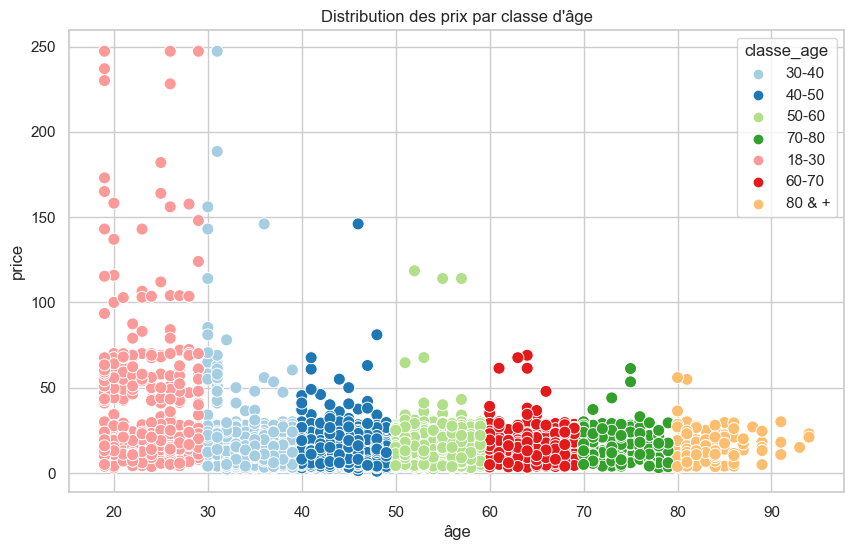

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=b2c.sample(4300), x='âge', y='price', hue='classe_age', s=75)
plt.title('Distribution des prix par classe d\'âge')
plt.savefig(url_fig + 'Distibution_prix_par_age_b2c.png', dpi=300, bbox_inches='tight')
plt.show()

<b>Conclusion:</b>
   * On voit assez clairement sur les deux nuages de points ci dessus que le CA et Prix moyen baissent avec l'âge ainsi que la pointe des 19 ans à 600 000 €
***

[Up](#Up)
<a class="anchor" id="section_3_2_3"></a>

<b>Répartition des âges clients par genre(h/f) </b>

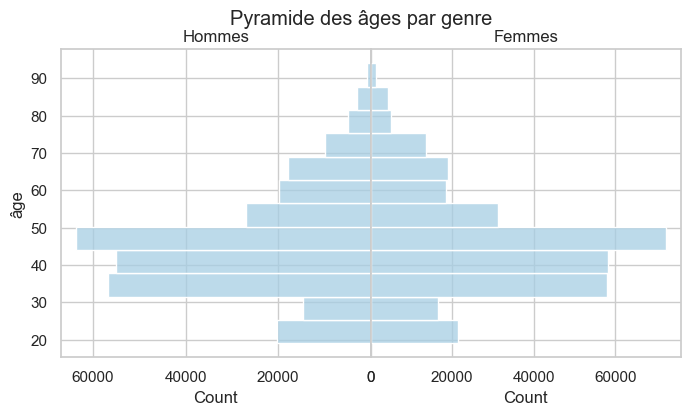

In [90]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Pyramide des âges par genre')

sns.histplot(ax=axes[0], y=b2c[b2c['sex']=='m']['âge'], bins=12)
axes[0].invert_xaxis()
axes[0].set_title('Hommes')

sns.histplot(ax=axes[1], y=b2c[b2c['sex']=='f']['âge'], bins=12)
axes[1].set_yticklabels([])
axes[1].set_ylabel('')
axes[1].set_title('Femmes')

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(url_fig + 'pyramide_ages.png', dpi=300, bbox_inches='tight')
plt.show()

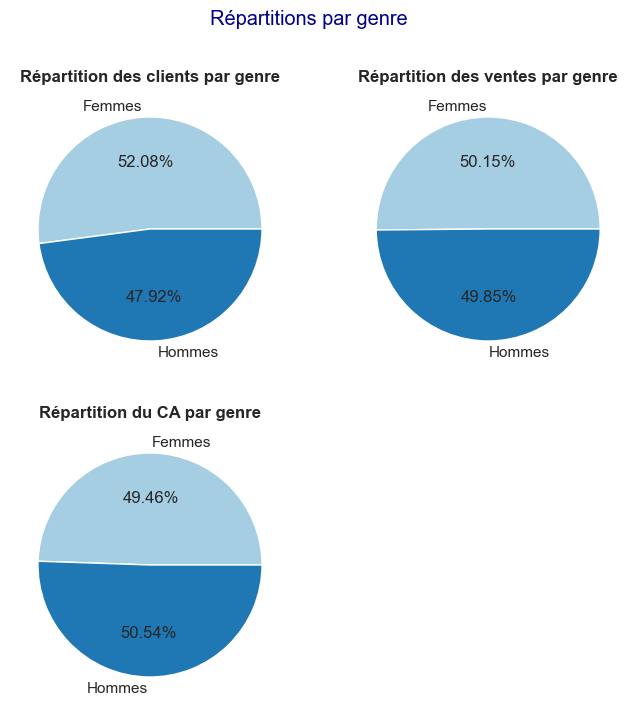

In [91]:
# Visualisation de la répartition & CA par genre 
fig = plt.figure(figsize =(8,8 ))
fig.suptitle('Répartitions par genre', color='darkblue')
ax1 = plt.subplot(2,2,1)
# Répartition des clients par genre
labels = ['Femmes', 'Hommes']
plt.pie(customers["sex"].value_counts(), autopct='%.2f%%', labels=labels, pctdistance=0.6, )
plt.title("Répartition des clients par genre", fontsize=12, fontweight='bold')

# Visualisation de la moyenne du prix par catégories
ax2 = plt.subplot(2,2,2)
# Répartition des ventes par genre
labels = ['Femmes', 'Hommes']
plt.pie(df["sex"].value_counts(), autopct='%.2f%%', labels=labels, pctdistance=0.6, )
plt.title("Répartition des ventes par genre", fontsize=12, fontweight='bold')
# Visualisation du prix par catégorie
ax3 = plt.subplot(2,2,3)
# création de la colonne "CA" en groupant les mêmes catégories et en faisant la somme des prix :
CA_genre = df.groupby('sex')['price'].sum().reset_index()
CA_genre.rename(columns = {'price':'CA'}, inplace=True)

# Diagramme de camembert
labels = ['Femmes', 'Hommes']
plt.pie(CA_genre["CA"], autopct='%.2f%%', labels=labels, pctdistance=0.6, )
plt.title("Répartition du CA par genre", fontsize=12, fontweight='bold')
plt.savefig(url_fig + 'Repartition_par_genre.png', dpi=300, bbox_inches='tight')
plt.show()

***
[Up](#Up)
<a class="anchor" id="chapter4"></a>   

<b>Mission Julie / tests statistiques</b> 

- En statistiques, un test, ou test d'hypothèse, est une procédure de décision entre deux hypothèses.Il s'agit d'une démarche consistant à rejeter ou à ne pas rejeter une hypothèse statistique, appelée hypothèse nulle, en fonction d'un échantillon de données. L'hypothèse nulle notée H0 est celle que l'on considère vraie a priori,c'est le scénario par défaut que l’on veut tester (il n'y a pas de lien\ les variables sont independantes\ la distribution est normale ...). L’hypothèse alternative ou H1 est par définition son opposé. Tous les tests statistiques fournissent une p-valeur ou pvalue : la probabilité de se tromper si l’on rejette H0. C’est la comparaison de cette pvalue avec le risque d’erreur initialement choisi( alpha à 5%) qui va permettre de de rejetter ou non l’hypothèse de départ. 

<a class="anchor" id="section_4_1"></a>    

<b>Corrélation entre le genre d'un client et les catégories de livres achetés</b> 

Nous utilisons le test d'indépendance du χ² qui mesure la corrélation entre 2 variables qualitatives.
   * Création de la table de contingence 
   * Carte de chaleur Heatmap
   * Test du χ²

In [92]:
# table de contingence: 
X = "sex"
Y = "categ"                 
cont = b2c[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
sex,,,,
f,192025,110550,16429,319004
m,178044,100227,15351,293622
Total,370069,210777,31780,612626


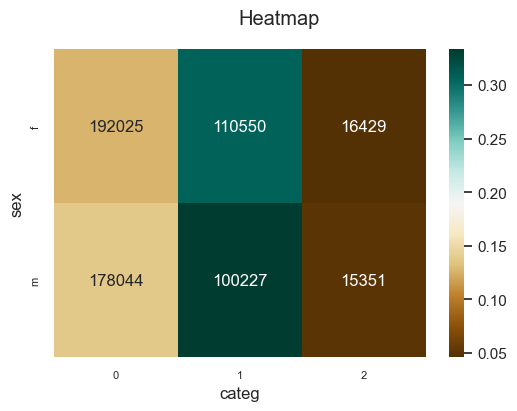

In [93]:
# heatmap: 
fig = plt.figure(figsize=(6,4 )) 
fig.suptitle('Heatmap')              
tx = cont.loc[:, ["Total"]]          
ty = cont.loc[["Total"], :]
n = len(b2c)
indep = tx.dot(ty) / n

measure = (cont - indep) ** 2 / indep
xi_n = measure.sum().sum()
table = measure / xi_n

sns.heatmap(table.iloc[:-1, :-1], annot=cont.iloc[:-1, :-1], fmt='d',cmap="BrBG")
plt.tick_params(axis='both', which='both', labelsize=8)
plt.savefig(url_fig + 'Heatmap-genre_categorie.png', dpi=300, bbox_inches='tight')
plt.show()

Chaque valeur de chaque case du Heatmap est une mesure de la contribution à la non-indépendance entre la catégorie de produit et le genre, qui prend des valeurs entre 0 et 1.
   * 0 représentant une source d'indépendance, et 1 une source de non-indépendance.
   * Dans le cas ci-dessus, la heatmap nous ferait pencher pour une non-dépendence, poursuite du test avec le Khi2

Test de Khi2 Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:   
   * H0: Les deux variables sont indépendantes
   * H1: les deux variables ne sont pas indépendantes

In [94]:
# test du Chi2 pour vérifier si les variables sex et catégorie de produit acheté sont indépendantes ou non
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
print("Satistique chi2 : ",st_chi2)
print("P value :",st_p)
print("Degrès de liberté :",st_dof)
# Compare la Pvalue au seuil de 5%
print("st_p>=0.05 :",st_p>=0.05)

Satistique chi2 :  18.757882515638208
P value : 0.004592685293327873
Degrès de liberté : 6
st_p>=0.05 : False


<b>La Pvalue est inférieure à 0.05 donc on peut donc rejeter l'hypothèse H0 avec un niveau de risque de 5%, les variables présentent légère corrélation entre elles et présentent un lien.</b>

***
[Up](#Up)
<a class="anchor" id="section_4_2"></a>   

<b>Corrélation entre l’âge des clients et le montant total des achats</b> 

Pour deux variables quantitatives, nous utilisons:
   * Visualisation avec nuage de points avec la régression linéaire
   * Test de corrélation (pearson)

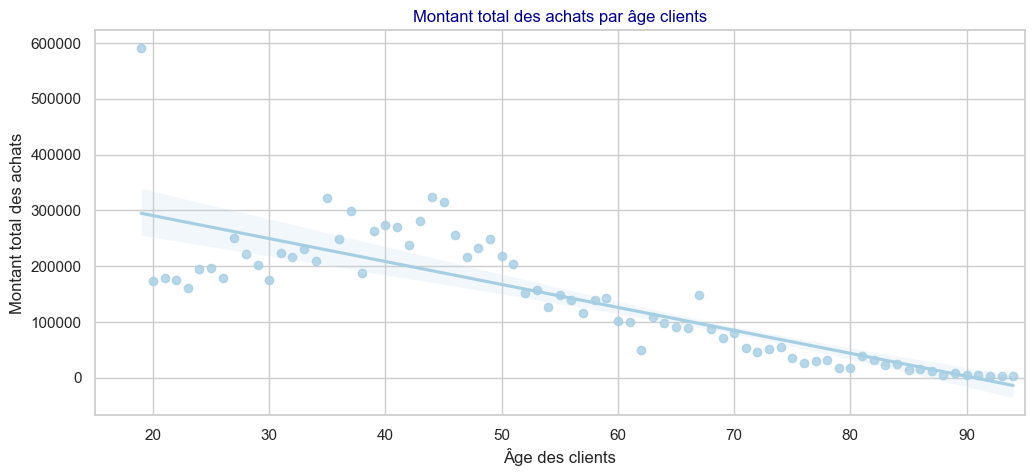

In [95]:
# Création du data 'âge et somme CA'
age_ca = b2c.groupby('âge')['price'].agg(['count', 'sum']).sort_values('sum').reset_index()
age_ca.head()
#Visualisation de l’âge des clients et le montant total des achats
plt.figure(figsize=(12, 5))
sns.regplot(x='âge', y='sum', data = age_ca)
plt.ylabel('Montant total des achats')
plt.xlabel('Âge des clients')
plt.title("Montant total des achats par âge clients", color = 'darkblue')
plt.xlim(15,95)
plt.savefig(url_fig + 'reg_age_achats.png', dpi=300, bbox_inches='tight')
plt.show()

In [96]:
age_ca.head()

,âge,count,sum
0,92,164,2691.19
1,94,199,3197.08
2,93,222,3959.24
3,88,260,4654.29
4,91,293,4803.64


#### Test de corrélation (pearson)

In [97]:
print('La covariance est de:', np.cov(age_ca['âge'], age_ca['sum'],ddof=0)[1,0])
print('Le coefficient de corrélation linéaire est de:', stats.pearsonr(age_ca['âge'], age_ca['sum'])[0])

La covariance est de: -1979349.1982802418
Le coefficient de corrélation linéaire est de: -0.8310031817688881


Conclusion:
Pour tester deux variables quantitatives, en utilisant le test de Pearson, obtentiond'un coefficient de -0.83.   
Il représente une forte corrélation entre l’âge des clients et le montant total des achats, mais dans un sens négatif d'un point de vue général (visible via le régression linéaire).

***
[Up](#Up)
<a class="anchor" id="section_4_3"></a>   

<b>Corrélation entre l’âge des clients et la fréquence d'achat</b> 

Deux variables quantitatives, On utilise:
   * Visualisation avec nuage de points avec la régression linéaire
   * Test de corrélation (pearson)

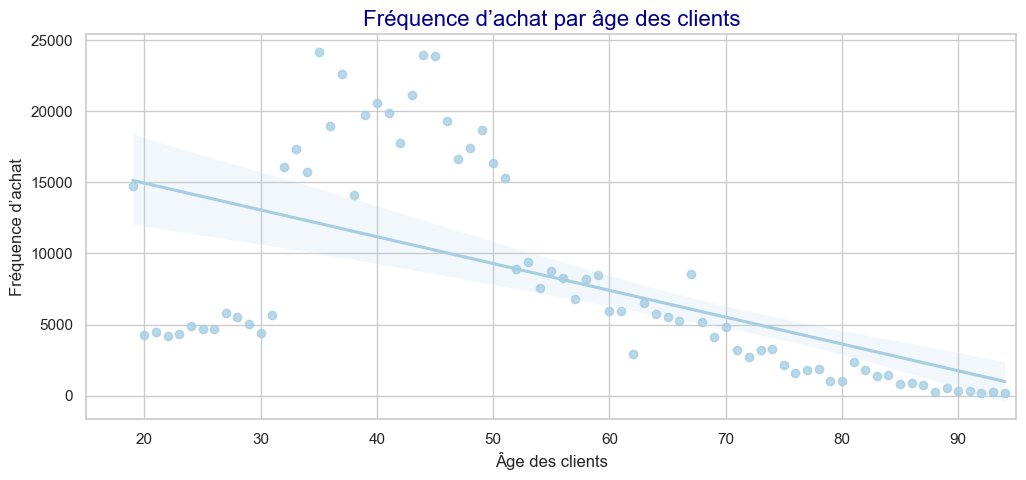

In [98]:
plt.figure(figsize=(12, 5))
sns.regplot(x='âge', y='count', data = age_ca)
plt.ylabel( 'Fréquence d’achat')
plt.xlabel('Âge des clients')
plt.title("Fréquence d’achat par âge des clients",fontsize= 16, color = 'darkblue')
plt.xlim(15,95)
plt.savefig(url_fig + 'reg_age_freq.png', dpi=300, bbox_inches='tight')
plt.show()

#### Test de corrélation (pearson)

In [99]:
print('La covariance est de:', np.cov(age_ca['âge'], age_ca['count'],ddof=0)[1,0])
print('Le coefficient de corrélation linéaire est de:', stats.pearsonr(age_ca['âge'], age_ca['count'])[0])

La covariance est de: -90673.09210526316
Le coefficient de corrélation linéaire est de: -0.5757476242202287


Conclusion:
Pour tester deux variables quantitatives, avec le test de Pearson, j’obtiens un coefficient de -0.575. Il représente une corrélation légèrement négative de nos 2 variables (visible aussi par régression linéaire). Quand on regarde le graphique, on peut voir que cette corrélation concerne plutôt les clients à partir de 50 ans.

Cependant, on ne retrouve pas cette relation pour les clients de moins de 50 ans:

Pour les moins de 30 ans, la fréquence est autour de 5000.
Pour les clients entre 31 et 50 ans, la fréquence est irrégulière.

***
[Up](#Up)
<a class="anchor" id="section_4_4"></a>   

<b>Corrélation entre l'âge des clients et la taille du panier moyen</b>

Deux variables quantitatives, On utilise:
   * Visualisation avec nuage de points avec la régression linéaire
   * Test de corrélation (pearson)

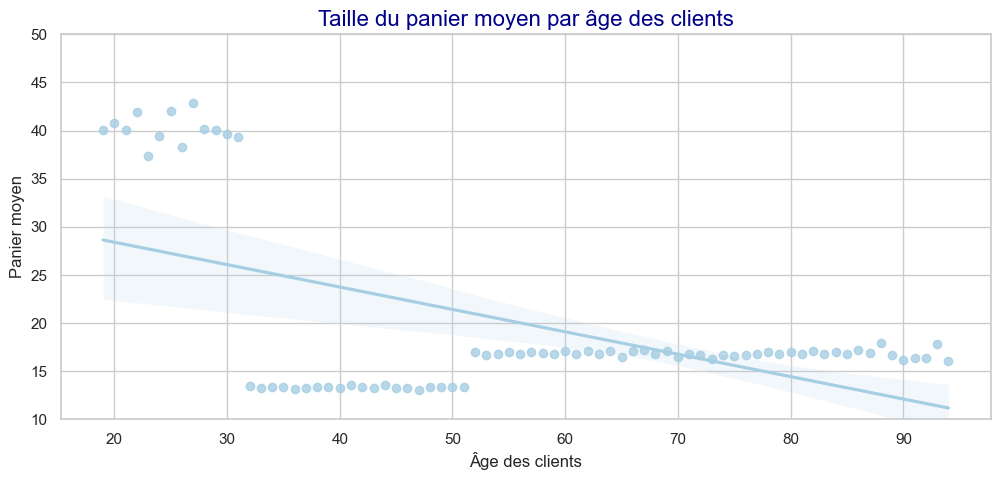

In [100]:
# Calcul du panier moyen
age_ca['panier_moyen'] = round(age_ca['sum']/age_ca['count'],2)
# Visualisation de la taille du panier moyen par âge Clients
plt.figure(figsize=(12, 5))
plt.ylim(10,50)
sns.regplot(x='âge', y='panier_moyen', data = age_ca)
plt.ylabel( 'Panier moyen')
plt.xlabel('Âge des clients')
plt.title("Taille du panier moyen par âge des clients",fontsize= 16, color = 'darkblue')
plt.savefig(url_fig + 'reg_age_pm.png', dpi=300, bbox_inches='tight')
plt.show()

In [101]:
age_ca.head()

,âge,count,sum,panier_moyen
0,92,164,2691.19,16.41
1,94,199,3197.08,16.07
2,93,222,3959.24,17.83
3,88,260,4654.29,17.90
4,91,293,4803.64,16.39


#### Test de corrélation (Pearson)

In [102]:
print('La covariance est de:', np.cov(age_ca['âge'], age_ca['panier_moyen'],ddof=0)[1,0])
print('Le coefficient de corrélation linéaire est de:', stats.pearsonr(age_ca['âge'], age_ca['panier_moyen'])[0])

La covariance est de: -112.00013157894736
Le coefficient de corrélation linéaire est de: -0.546472902988183


#### Conclusion

Test de Pearson avec obtention d'un coefficient de -0.546. Celà représente une corrélation légèrement négative des 2 variables.
On observe sur le graphique que:
   * Les jeunes de moins de 31 ans ont un panier moyen plus élevé avec un montant assez constant (autour de 40 euros).
   * Les clients entre 31-50 ans ont un panier moyen plus bas avec un montant quasi constant (autour de 13 euros).
   * Les clients à partir de 50 ans ont un panier moyen à montant quasi constant, mais un peu plus élevé (autour de 17 euros).

***
[Up](#Up)
<a class="anchor" id="section_4_5"></a>   

<b>Corrélation entre l'âge des clients  et les catégories de livres achetés</b>

Une variable quantitative (Age) et une variable qualitative (Categories): ANOVA
   * Visualisation avec boxplots
   * Vérification de la possibilité d'utiliser ANOVA
   * Test de Kruskal-Wallis
   * Test ANOVA

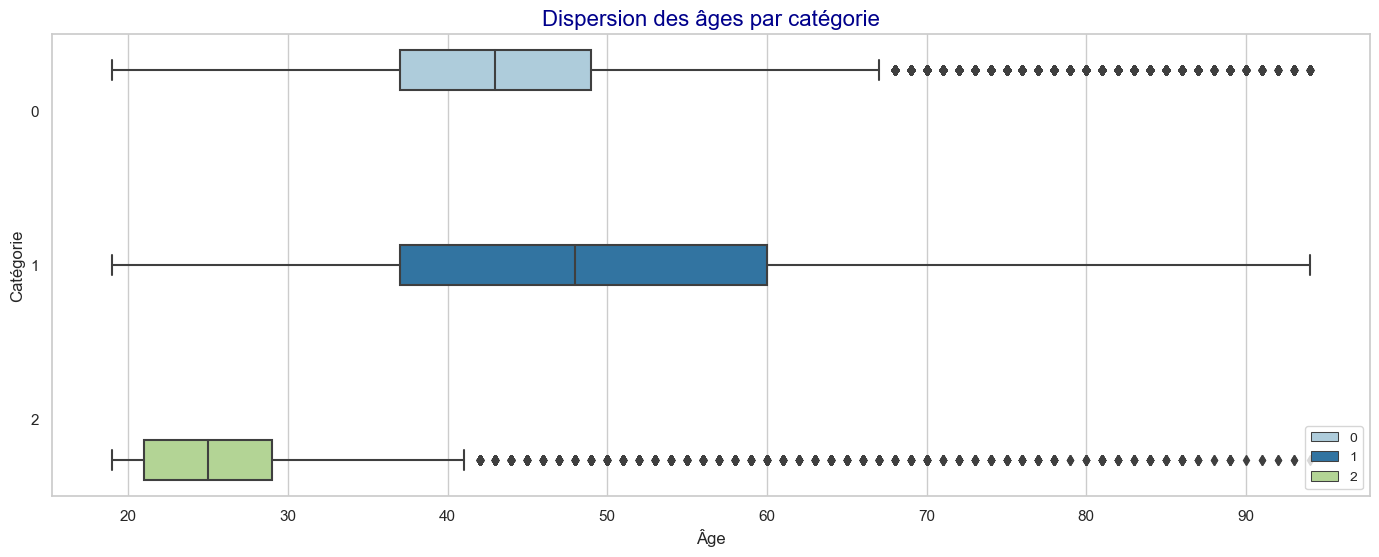

In [103]:
# Dispersion des âges clients par catégorie
categories = ['catégorie 0', 'catégorie 1', 'catégorie 2']
plt.figure(figsize=(17, 6))
sns.boxplot(y="categ", x="âge", data = b2c, orient='h', hue='categ', palette='Paired')
plt.title('Dispersion des âges par catégorie',fontsize= 16, color = 'darkblue')
plt.xlabel('Âge')
plt.ylabel('Catégorie')
plt.savefig(url_fig + 'dispersion des ages par cat.png', dpi=300, bbox_inches='tight')
plt.legend(loc='lower right', fontsize=10)

Rapport de corrélation η2 (eta carré )
   * η2=0 , cela signifie que les moyennes par classes sont toutes égales. Il n’y a donc pas à priori de relation entre les deux variables.
   * η2=1 , cela signifie que les moyennes par classes sont très différentes, chacune des classes étant constituée de valeurs identiques : il existe donc à priori une relation entre les deux variables.

In [104]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

eta_s  =eta_squared(b2c['categ'], b2c['âge'])
print('Le rapport de corrélation ', round(eta_s,2) ,', indique que ces 2 variables sont faiblement corrélées')

Le rapport de corrélation  0.11 , indique que ces 2 variables sont faiblement corrélées


#### Vérification de la possibilité d'utiliser la méthode ANOVA
   * Si la variable âge ne suit pas une loi normale et que les variances pour chaque groupe ne sont pas égales, on utilise le test de Kruskal – Wallis qui est similaire au test d'ANOVA.)

    * Test de Kolmogorov-Smirnov - vérification de la normalité de chaque groupe de la variable 'categ'
   * Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:
   * H0:la variable suit une loi normale
   * H1:la variable ne suit pas une loi normale

In [105]:
ca_0 = b2c[b2c['categ'] == 0]['âge']
ca_1= b2c[b2c['categ'] == 1]['âge']
ca_2 = b2c[b2c['categ'] == 2]['âge']

In [106]:
# Test la normalité pour les données de catégorie 0
test_stat_0 =kstest(ca_0, 'norm')
test_stat_0

KstestResult(statistic=1.0, pvalue=0.0)

In [107]:
# Test la normalité pour les données de catégorie 1
test_stat_1 =kstest(ca_1, 'norm')
test_stat_1

KstestResult(statistic=1.0, pvalue=0.0)

In [108]:
# Test la normalité pour les données de catégorie 2
test_stat_2 =kstest(ca_2, 'norm')
test_stat_2

KstestResult(statistic=1.0, pvalue=0.0)

##### Pour ces 3 catégories les p_valeurs sont < 0.5; nous rejetons l’hypothèse nulle, aussi la variable âge ne suit pas une loi normale: nous excluons donc les tests de student
- Test de Bartlett - vérification de l'homogénéité de chaque groupe de la variable 'categ'
   * Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:
   * H0: les variances de chaque groupe de catégorie sont égaux
   * H1: les variances de chaque groupe de catégorie ne sont pas égaux

In [109]:
stat, p = bartlett(ca_0, ca_1, ca_2)
print( 'p_value:',p)

p_value: 0.0


##### p_value < 0.05, nous rejetons l’hypothèse nulle, donc les variances de chaque groupe de catégorie ne sont pas égales.
#### La variable âge ne suit pas la loi normale et les variances de chaque groupe ne sont pas égales, Aneva ne peut s'appliquer, nous testons donc le test de Kruskal – Wallis qui est équivalent à ANOVA, mais non paramétrique en utilisant les médianes au lieu des moyennes.

#### Test de Kruskal-Wallis
   * Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:
   * H0: les médians de chaque groupe de catégorie sont égaux
   * H1: les médians de chaque groupe de catégorie ne sont pas égaux

In [110]:
stats.kruskal(ca_0, ca_1, ca_2)

KruskalResult(statistic=69911.21351199699, pvalue=0.0)

In [111]:
#bis
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data0 = ca_0
data1 = ca_1
stat, p = kruskal(data0, data1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=11037.921, p=0.000
Probably different distributions


#### Test de ANOVA 
##### Test de ANOVA, même si les données ne s'y prêtent pas, pour une variable quantitative et une variable qualitative

- Test de la moyenne (f_oneway)
   * Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:
   * H0: les moyennes de chaque groupe de catégorie sont égaux
   * H1: les moyennes de chaque groupe de catégorie ne sont pas égaux

In [112]:
fvalue, pvalue= stats.f_oneway(ca_0, ca_1, ca_2)
print('f_value:',fvalue, ', p_value:',pvalue )

f_value: 39074.27975083935 , p_value: 0.0


##### p_valeur < 0.05, rejet de l’hypothèse nulle, donc les moyennes de chaque groupe de catégorie ne sont pas égaux
    
Conclusion:
   * Avec le rapport de corrélation 0.11 , on identifie un lien faible entre l’âge des clients et les catégories des livres achetés.
   * <b>Cependant les tests de 'Kruskal-Wallis' et 'ANOVA' montrent que les médians ou les moyennes de chaque groupe de catégorie sont différents, idem pour le graphique des boxplots,ce qui pourrait laisse penser que chacune des tranches d'âge a des préférences de catégories d'achat.</b>
   * Pour le confirmer ou l'infirmer , nous allons faire un test de Khi2 entre deux variables qualitatives ('tranche d'âge' et 'catégorie de produits'). 

#### Analyse de deux variables qualitatives (Classe ages & catégories)
   
   * Création d'un tableau de contingence
   * Calcul du coefficient de chi2
   * Il est également possible de faire apparaître une corrélation sur une heatmap.

In [113]:
# Contrôle
b2c.head()

,id_prod,date,session_id,client_id,année,mois,année_mois,jours,heure,sex,âge,price,categ,type,classe_age
0,0_1518,2022-05-20,s_211425,c_103,2022,5,2022-05,20,13,f,37,4.18,0,B2C,30-40
1,1_251,2022-02-02,s_158752,c_8534,2022,2,2022-02,2,7,m,35,15.99,1,B2C,30-40
3,2_209,2021-06-24,s_52962,c_6941,2021,6,2021-06,24,4,m,23,69.99,2,B2C,18-30
4,0_1509,2023-01-11,s_325227,c_4232,2023,1,2023-01,11,8,m,43,4.99,0,B2C,40-50
5,0_1418,2022-10-20,s_285425,c_1478,2022,10,2022-10,20,15,f,51,8.57,0,B2C,50-60


In [114]:
# Création d'une table de contingence, variables «tranche d'âge» et « catégorie »
x = 'classe_age'
y = 'categ'
cont_age = b2c[[x, y]].pivot_table(index=x, columns=y,aggfunc=len, margins=True, margins_name='Total' )
cont_age

categ,0,1,2,Total
classe_age,,,,
18-30,13739,23938,24928,62605
30-40,114587,39622,4544,158753
40-50,149873,48612,734,199219
50-60,51881,45442,702,98025
60-70,23723,31546,535,55804
70-80,11049,14493,209,25751
80 & +,5217,7124,128,12469
Total,370069,210777,31780,612626


#### Test de Khi2
   * Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:
   * H0: Les deux variables (les tranches d'âge des clients et les catégories des livres achetés ) sont indépendantes
   * H1: les deux variables ne sont pas indépendantes

In [115]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont_age)
print("Satistique chi2 : ",st_chi2)
print("P value :",st_p)
print("Degrès de liberté :",st_dof)
# Compare la Pvalue au seuil de 5%
print("st_p>=0.05 :",st_p>=0.05)

Satistique chi2 :  222121.1683729485
P value : 0.0
Degrès de liberté : 21
st_p>=0.05 : False


In [116]:
# heatmap
fig = plt.figure(figsize=(6,4 ))
fig.suptitle('Heatmap')
tx = cont_age.loc[:, ["Total"]]
ty = cont_age.loc[["Total"], :]
n = len(b2c)
indep = tx.dot(ty) / n

<Figure size 600x400 with 0 Axes>

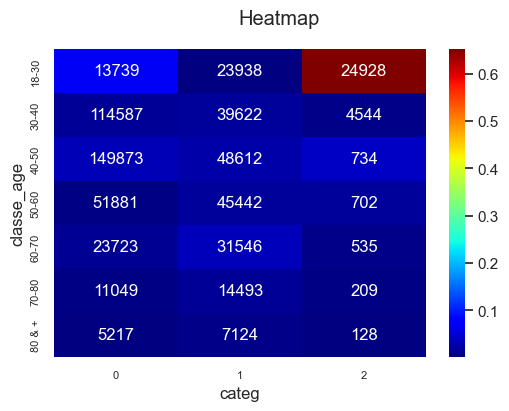

In [117]:
# heatmap
fig = plt.figure(figsize=(6,4 ))
fig.suptitle('Heatmap')
tx = cont_age.loc[:, ["Total"]]
ty = cont_age.loc[["Total"], :]
n = len(b2c)
indep = tx.dot(ty) / n

measure = (cont_age - indep) ** 2 / indep
xi_n = measure.sum().sum()
table2 = measure / xi_n

sns.heatmap(table2.iloc[:-1, :-1], annot=cont_age.iloc[:-1, :-1], fmt='d',cmap="jet")
plt.tick_params(axis='both', which='both', labelsize=8)
plt.savefig(url_fig + 'Heatmap-age_categorie.png', dpi=300, bbox_inches='tight')
plt.show()

<b>Conclusion</b>
   * Notre p-value étant de 0 et < 0.05 (alpha = 5%), on rejete H0 et on peut alors conclure que les variables 'classe_age' et catégorie de produits sont <u>dépendantes.</u>
   * Avec le heatmap, on peut  voir une forte corrélation entre les personnes âgés de 18 à 30 ans et la catégorie 2.
   

***
[Up](#Up)
***

<u><b>Conclusions:</b></u>   

Points Clefs:   

<u>Chiffre d’affaires:</u>   
Depuis l’ouverture de la boutique LAPAGE en mars 2021 et après une chute de CA en octobre 2021 qui reste inexpliquée, le chiffre d’affaires s’est depuis stabilisé autour de 500 000 € par mois. Le Prix Moyen augmente légèrement de 17,14 € à 17.88 €. La moyenne mensuelle du volume a également progressé de 2021 à 2022 d’environ 4 %. Les 2 mois sur 2023 ne sont pas suffisants pour être significatifs.
les moyennes mobiles démontrent aussi une stabilité des ventes.   

<u>Références et catégories</u>   
Les 2 catégories 0 et 1 les moins chères avec respectivement un prix moyen de 10,64 € et 20,49 € représentent 80 % du CA et 95 % du volume. Cependant la catégorie 2 avec 5 % du volume fait 23 % du CA , cette catégorie intéressent les plus jeunes et doit être retravaillée en profondeur: axe de développement.
A contrario , il existe de nombreuses références qui ne tournent pas, ne sont pas rentables et devraient être remplacées.   

<u>Profil Clients:</u>   
4 clients ‘pros’ doivent être suivis avec un service dédié pour un meilleur développement.
La répartition par genre (h,f) est très homogène et ne demande pas d’ajustement particulier.    

<u>Tests statistiques:</u>   
Nous ont permis de démontrer qu’il ya un lien entre le genre et les catégories de livres achetés, que le montant global des achats baisse avec l’âge des clients , qu’il en va de même pour la frequence d’achat et que les 32-52 ans sont les clients les plus actifs.
Enfin les tests réalisés et l’heatmap finale démontrent bien le lien entre les clients par groupes d’âge et les les catégories de livres achetés.
    